In [1]:
!pip install imblearn

# Importing Libraries

In [2]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing

# Libraries to help with data visualization
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import scipy.stats as stats


# Libraries to import decision tree classifier and different ensemble classifiers

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

no_cpus=multiprocessing.cpu_count()-1

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)


# Loading Dataset

In [3]:
hr=pd.read_csv("HR_Employee_Attrition.csv")

In [4]:
# copying data to another varaible to avoid any changes to original data
data=hr.copy()

# Basic Data Exploration

In [5]:
data.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
data.tail()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2935,2936,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2936,2937,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2937,2938,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2938,2939,No,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
2939,2940,No,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [7]:
data.shape

(2940, 35)

# Checking the data types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EmployeeCount             2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

Observation:
* There are no null values in the dataset.
* We can convert the object type columns to categories since converting "objects" to "category" reduces the data space required to store the dataframe

### Dropping columns which are not adding any information

In [9]:
data.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18','DailyRate','HourlyRate','MonthlyRate'],axis=1,inplace=True)

In [10]:
# let's check for duplicate values in the data
data.duplicated().sum()

1470

In [11]:
# Let's drop the duplicate values
data.drop_duplicates(inplace=True)

In [12]:
# Making sure there are no duplicate values
data.duplicated().sum()

0

In [13]:
# Checking the dataset for missing values
data.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Fixing the data types

In [14]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [15]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition                 1470 non-null   category
 1   Age                       1470 non-null   int64   
 2   BusinessTravel            1470 non-null   category
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EnvironmentSatisfaction   1470 non-null   int64   
 8   Gender                    1470 non-null   category
 9   JobInvolvement            1470 non-null   int64   
 10  JobLevel                  1470 non-null   int64   
 11  JobRole                   1470 non-null   category
 12  JobSatisfaction           1470 non-null   int64   
 13  MaritalStatus             1470 non-null   catego

# Summary of numerical features

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0


Observation:
* EmployeeNumber is an ID variable and not useful for predictive modeling.
* Age of the employees range from 18 to 60 years and the average age is 36 years.
* EmployeeCount has only 1 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* Standard Hours has only 80 as the value in all the rows and can be dropped as it will not be adding any information to our analysis.
* Hourly rate has a huge range, but we do not know what this variable stands for, yet. The same goes for daily and monthly rates.
* Monthly Income has a high range and the difference in mean and median indicate the presence of outliers.

In [18]:
data.describe(include=['category']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


Observation:

* Attrition is our target variable with 84% records 'No' or employee will not attrite.
* Majority of the employees have low business travel requirements
* Majority of the employees are from the Research and Development department.
* All employees are over 18 years of age - we can drop this variable as it will not be adding any information to our analysis.
* There are more male employees than female employees.

### Let's look at the unique values of all the categories

In [19]:
cols_cat= data.select_dtypes(['category'])

In [20]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Attrition are :
No     1233
Yes     237
Name: Attrition, dtype: int64
**************************************************
Unique values in BusinessTravel are :
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
**************************************************
Unique values in Department are :
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
**************************************************
Unique values in EducationField are :
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
**************************************************
Unique values in Gender are :
Male      882
Female    588
Name: Gender, dtype: int64
**************************************************
Unique values in JobRole are :
Sales Executive    

Observations:

Note a class imbalance problem with the target variable.
Contemplating data conversion:

OverTime and Attrition can be, and indeed need to be, converted to boolean 0/1 variables.
Gender is also a binary variable.
BusinessTravel is an ordinal, categorical variable.
Department, EducationField, JobRole, MaritalStatus, are non-ordinal categorical variables.

# EDA

### Univariate analysis 

In [21]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

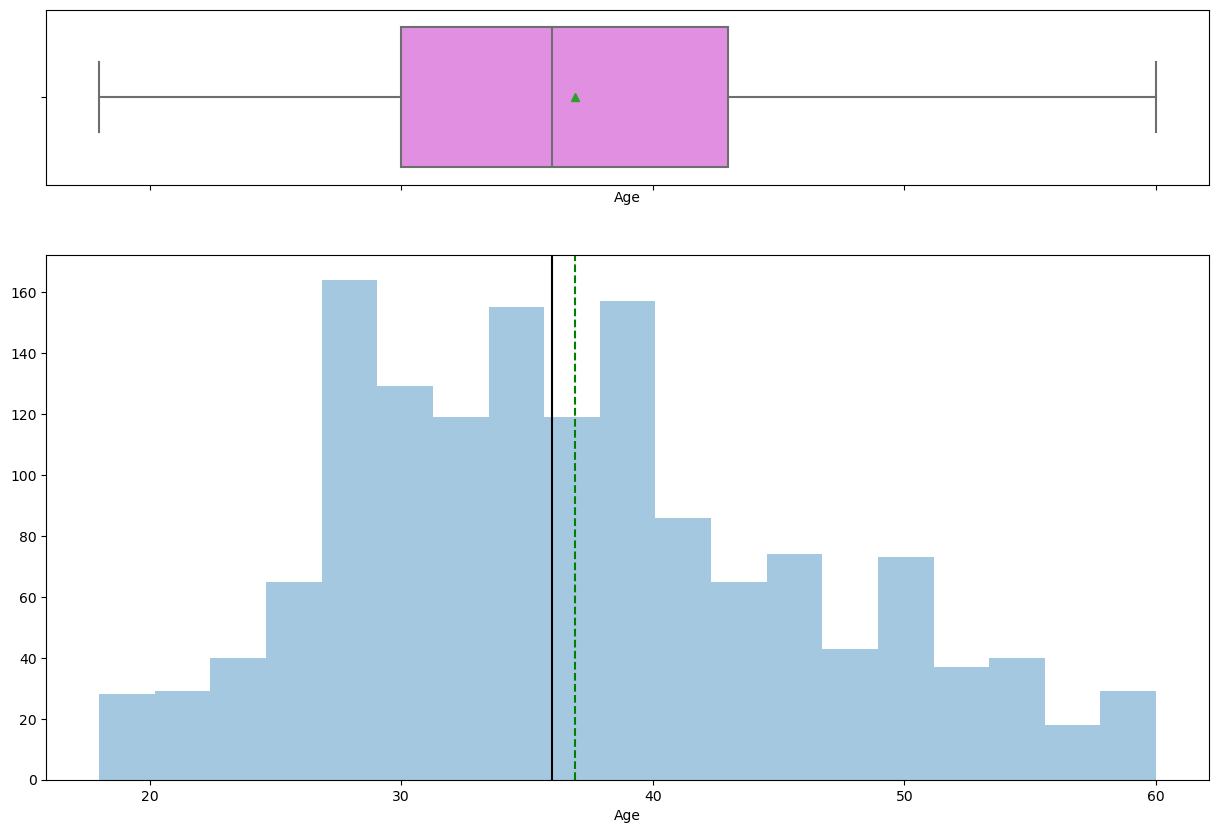

In [22]:
histogram_boxplot(data['Age'])

### Observations on DailyRate

### Observations on DistanceFromHome 

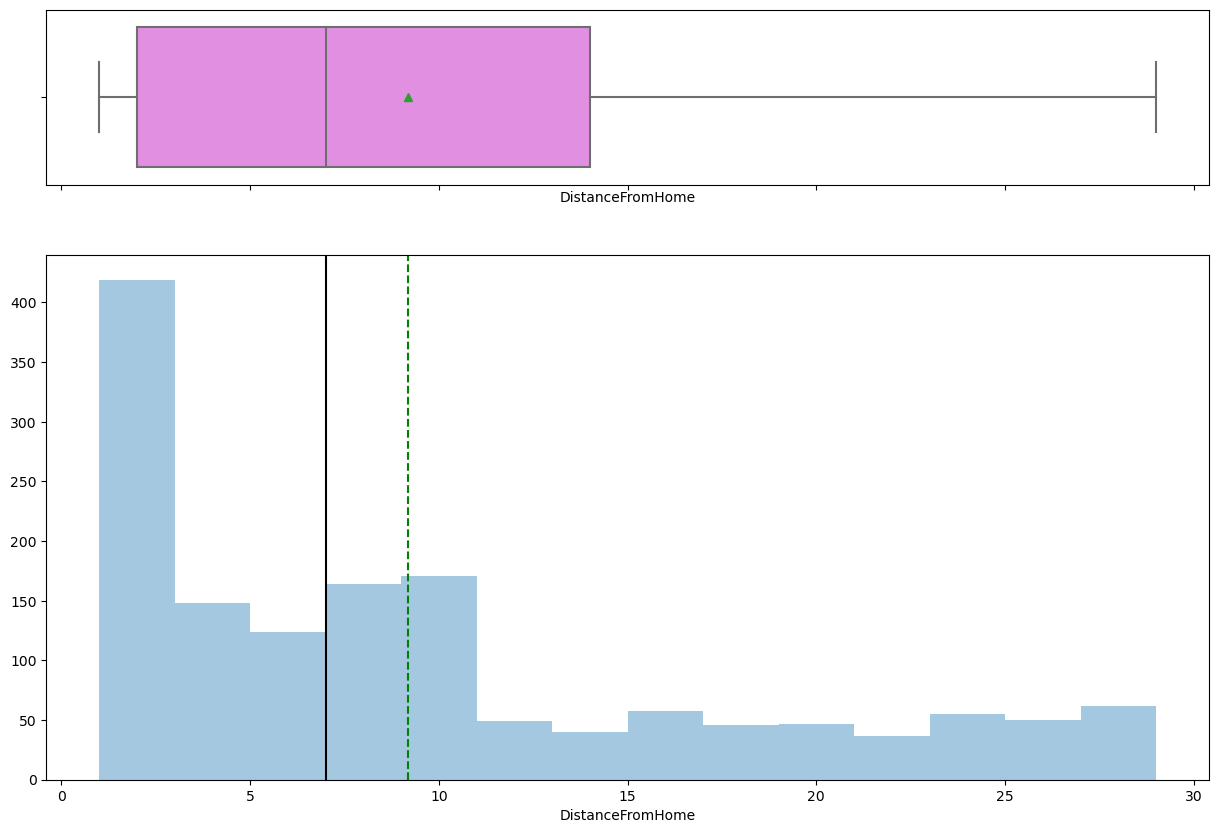

In [23]:
histogram_boxplot(data['DistanceFromHome'])

### Observations on HourlyRate

### Observations on MonthlyIncome

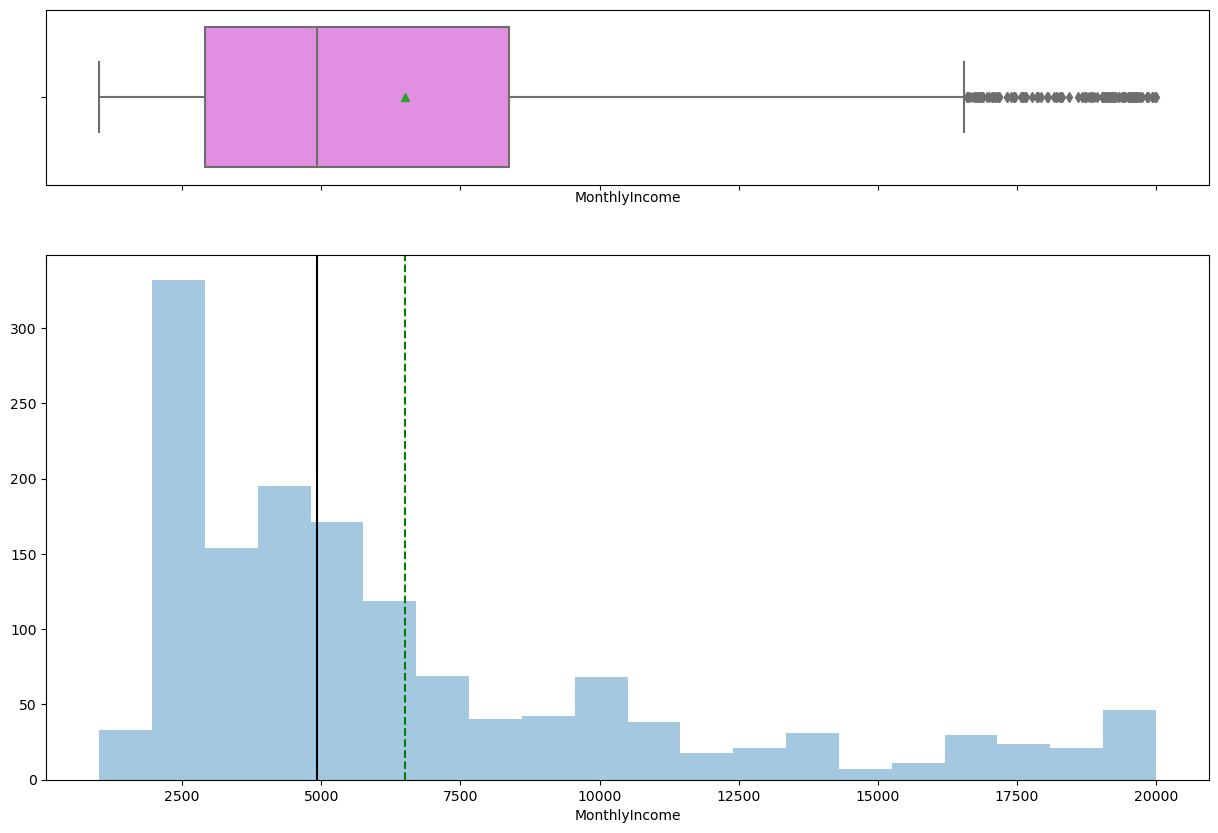

In [24]:
histogram_boxplot(data['MonthlyIncome'])

### Observations on MonthlyRate

### Observations on NumCompaniesWorked

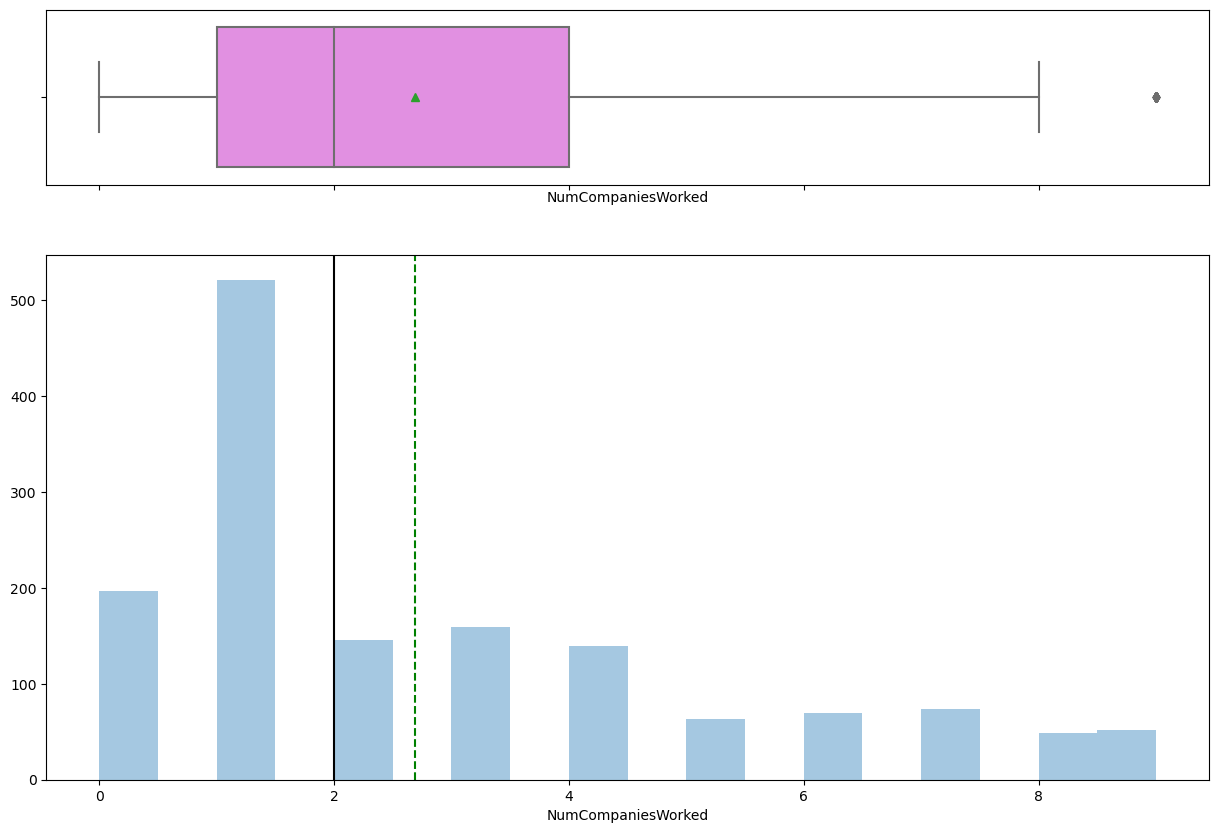

In [25]:
histogram_boxplot(data['NumCompaniesWorked'])

### Observations on PercentSalaryHike

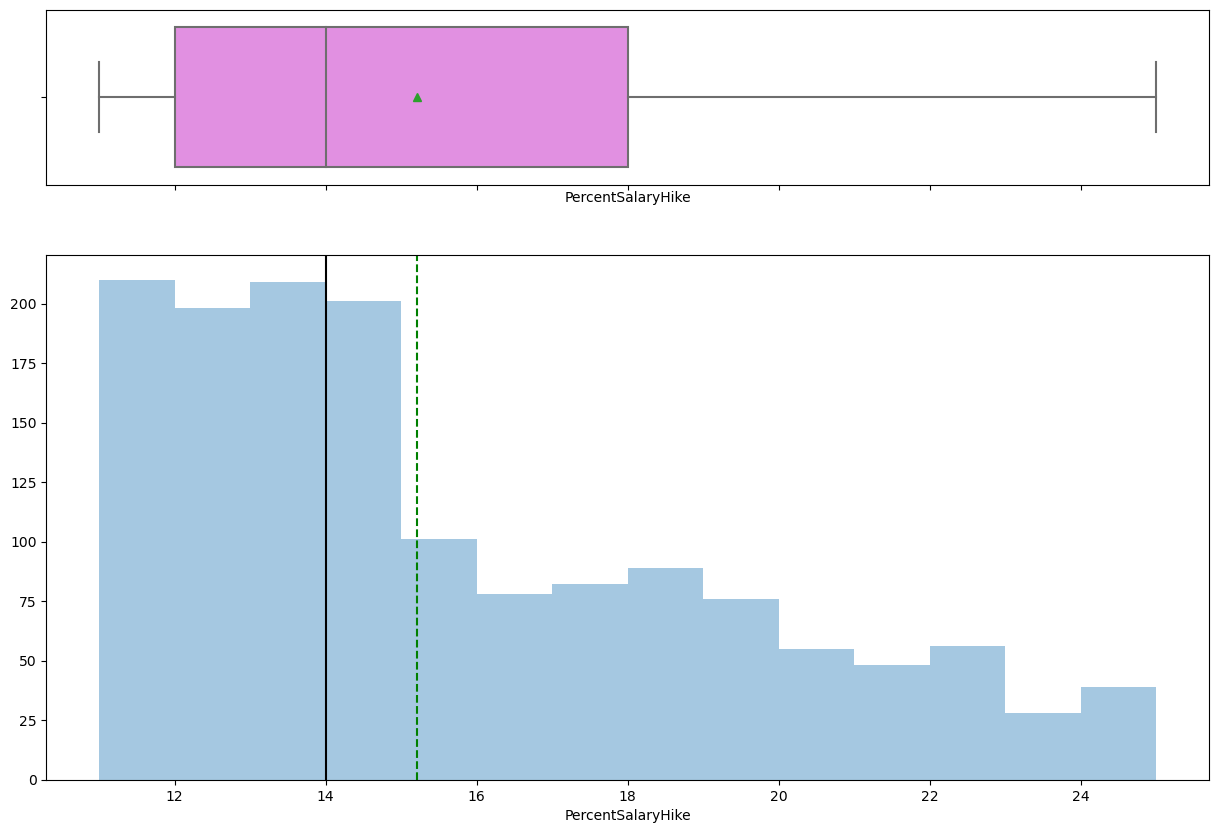

In [26]:
histogram_boxplot(data['PercentSalaryHike'])

### Observations on TotalWorkingYears

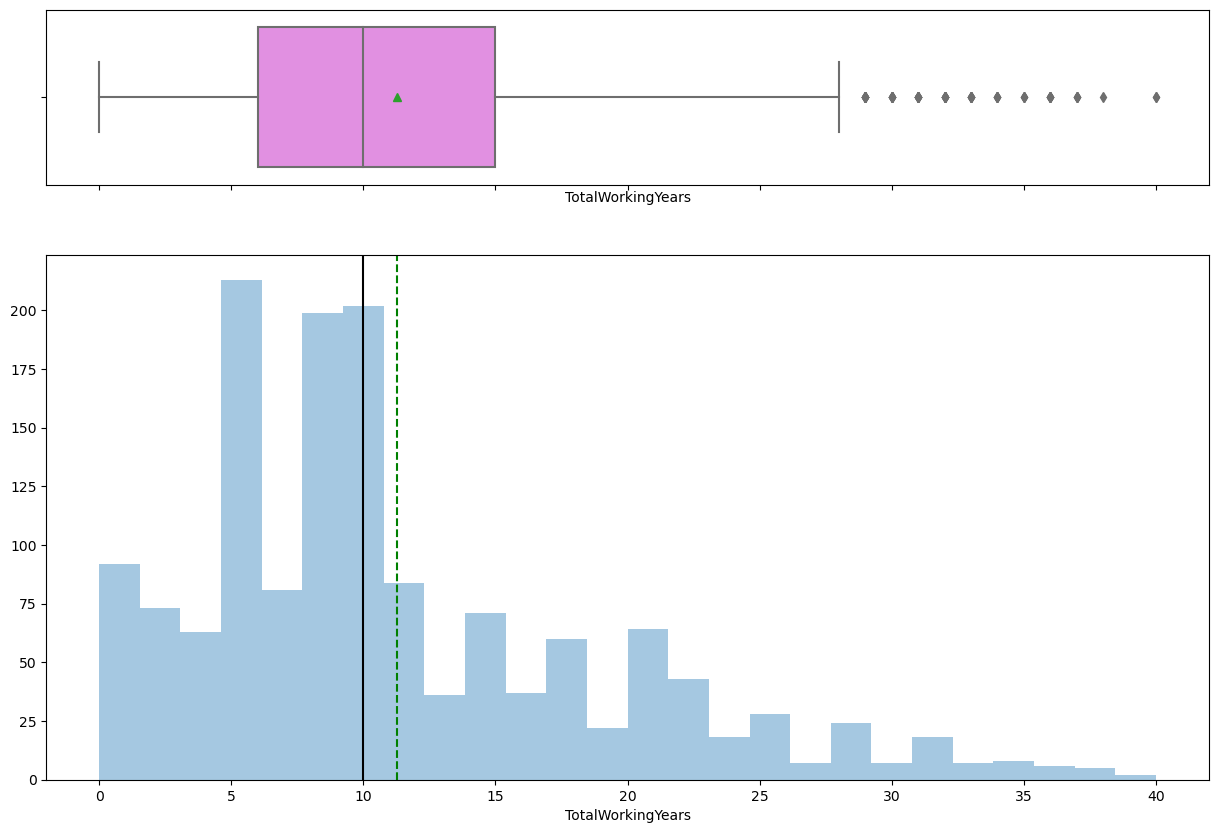

In [27]:
histogram_boxplot(data['TotalWorkingYears'])

### Observations on YearsAtCompany

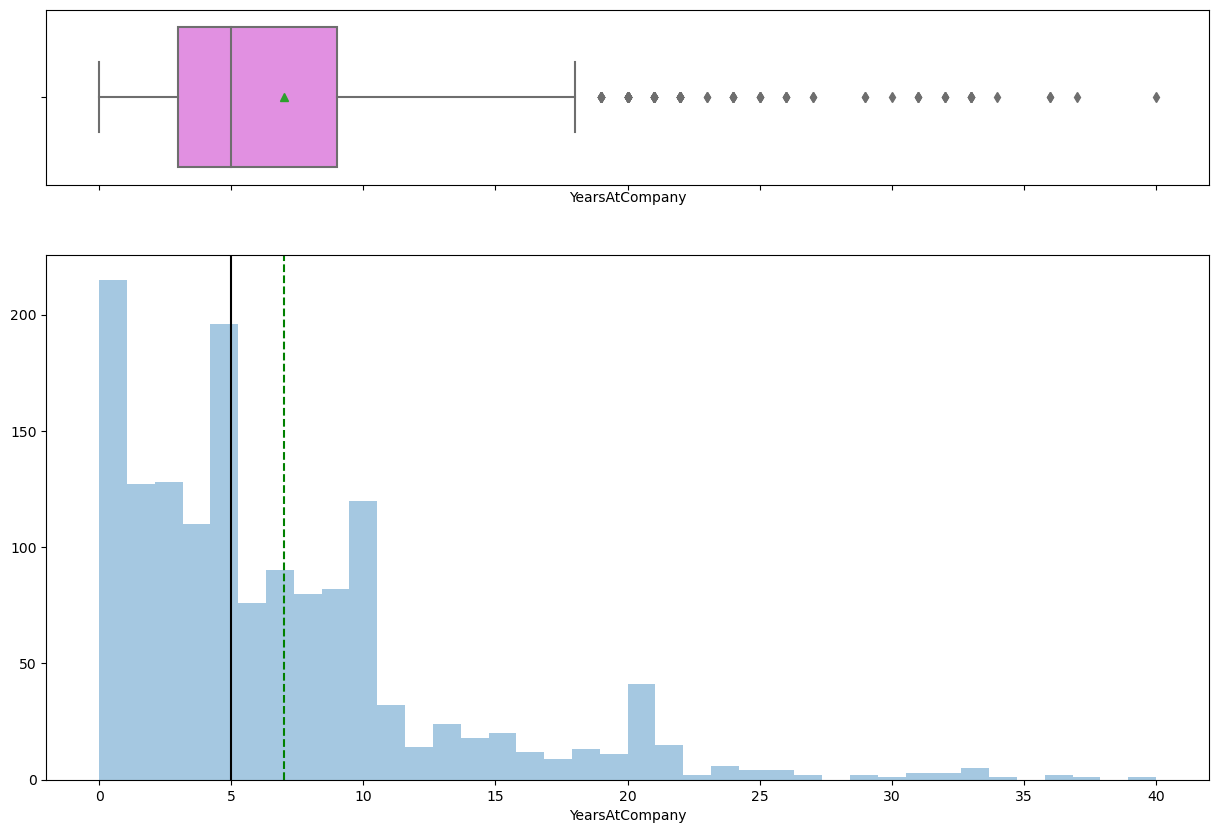

In [28]:
histogram_boxplot(data['YearsAtCompany'])

### Observations on YearsInCurrentRole

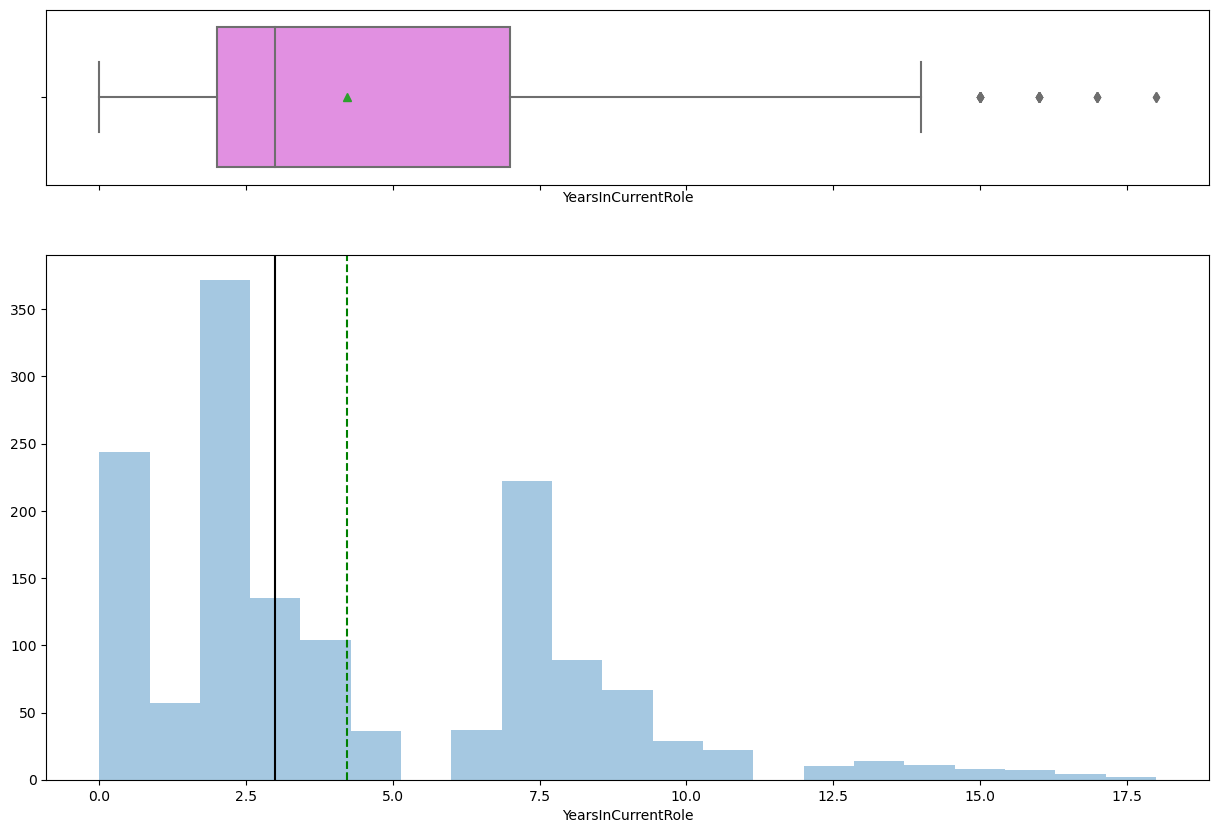

In [29]:
histogram_boxplot(data['YearsInCurrentRole'])

In [30]:
data[data["YearsInCurrentRole"] > 17.5]

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
123,No,51,Travel_Rarely,Research & Development,6,3,Life Sciences,1,Male,3,5,Research Director,3,Single,19537,7,No,13,3,3,0,23,5,3,20,18,15,15
190,No,52,Travel_Rarely,Research & Development,1,4,Life Sciences,3,Male,2,5,Manager,3,Married,19999,0,No,14,3,1,1,34,5,3,33,18,11,9


In [31]:
# Checking 10 largest YearsInCurrentRole values
data.YearsInCurrentRole.nlargest(10)

123     18
190     18
231     17
1024    17
1327    17
1351    17
63      16
281     16
466     16
716     16
Name: YearsInCurrentRole, dtype: int64

In [32]:
# Capping values for YearsInCurrentRole with 18
data["YearsInCurrentRole"].clip(upper=18, inplace=True)

### Observations on YearsSinceLastPromotion

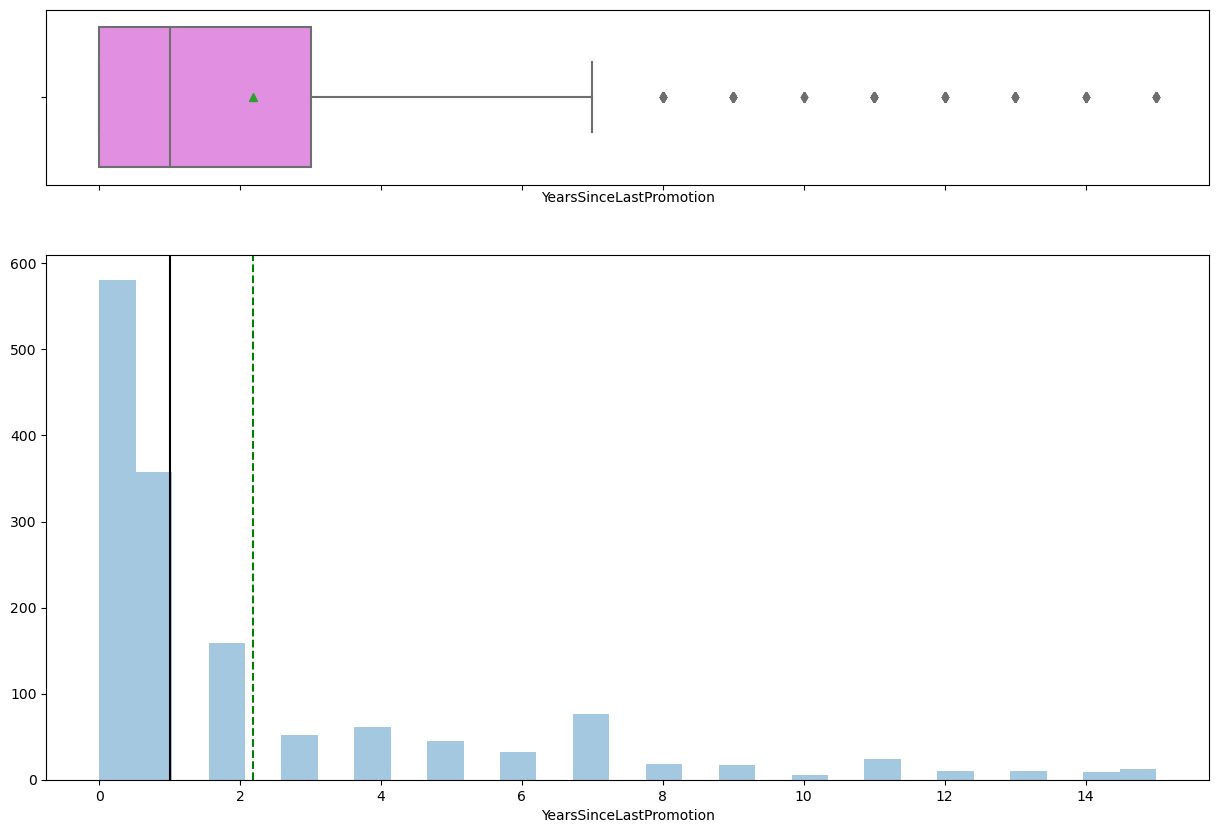

In [33]:
histogram_boxplot(data['YearsSinceLastPromotion'])

### Observations on YearsWithCurrManager

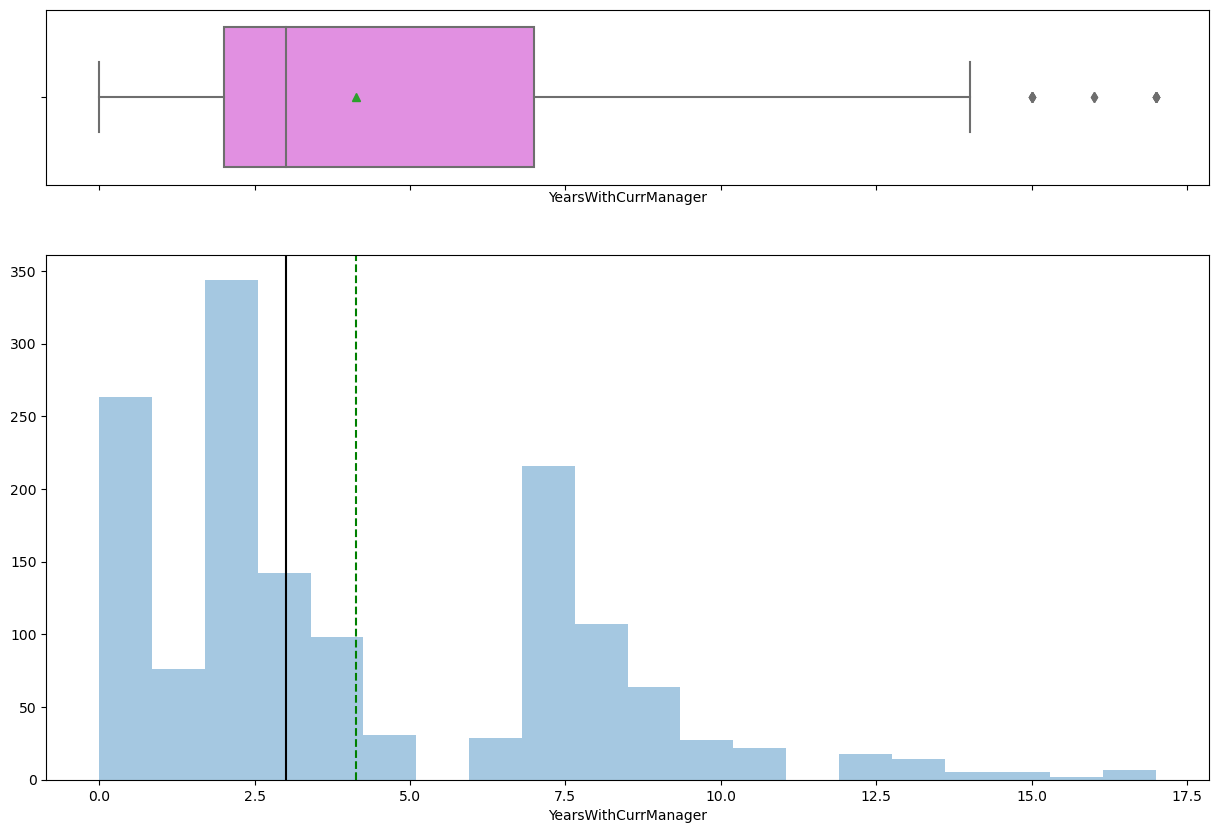

In [34]:
histogram_boxplot(data['YearsWithCurrManager'])

# Categorical Features

In [35]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

### Observations on BusinessTravel

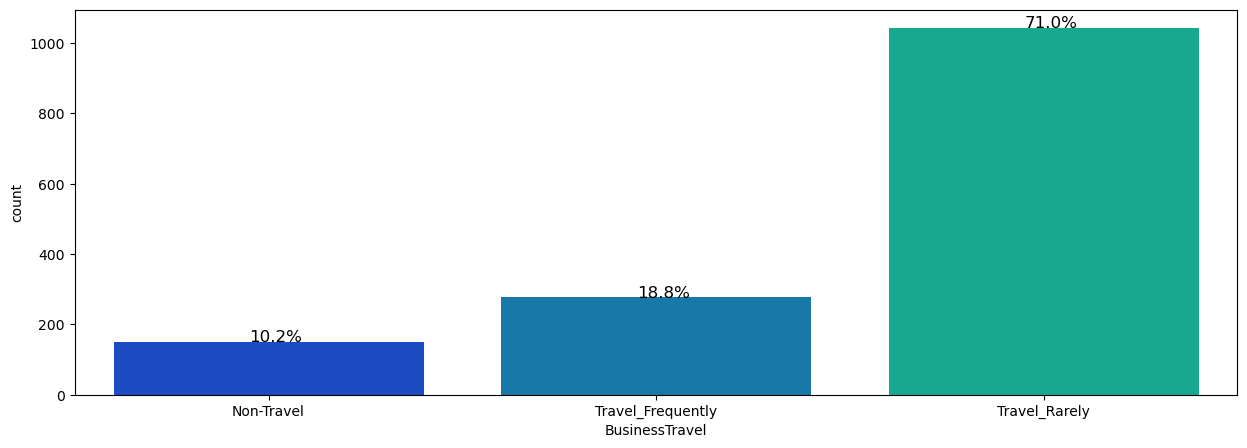

In [36]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["BusinessTravel"],palette='winter')
perc_on_bar(ax,data["BusinessTravel"])

### Observations on Department

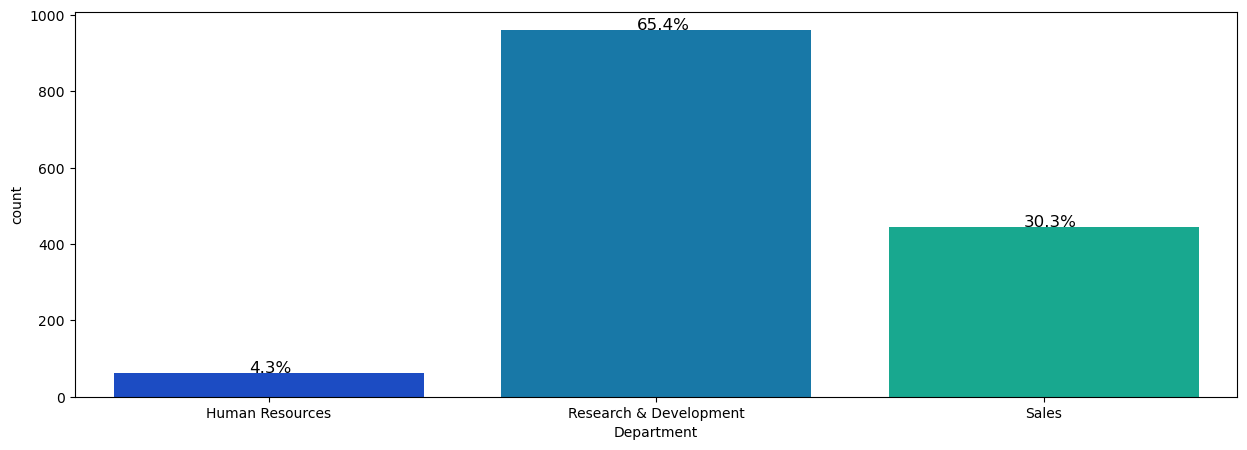

In [37]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Department"],palette='winter')
perc_on_bar(ax,data["Department"])

### Observations on EducationField

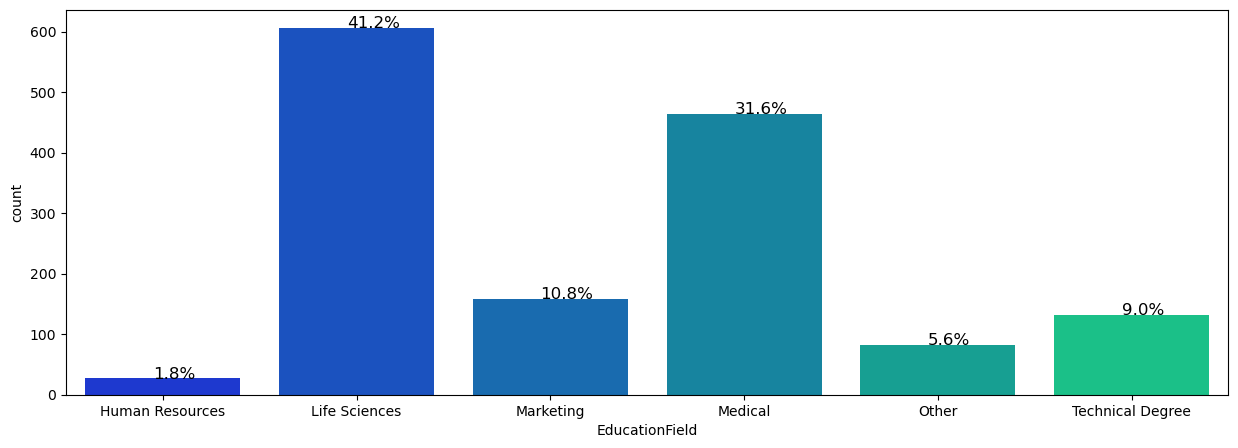

In [38]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["EducationField"],palette='winter')
perc_on_bar(ax,data["EducationField"])

### Observations on Gender

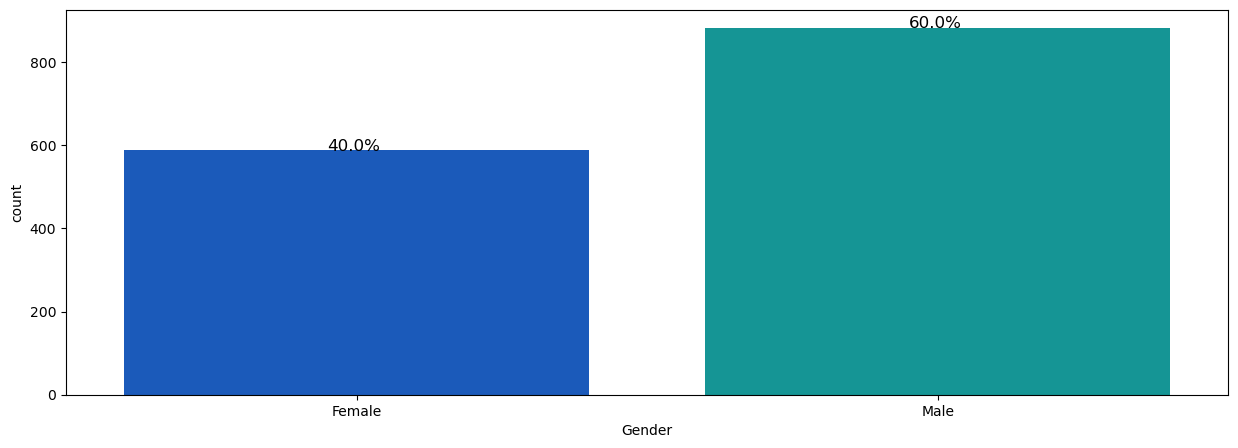

In [39]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Gender"],palette='winter')
perc_on_bar(ax,data["Gender"])

### Observations on JobRole

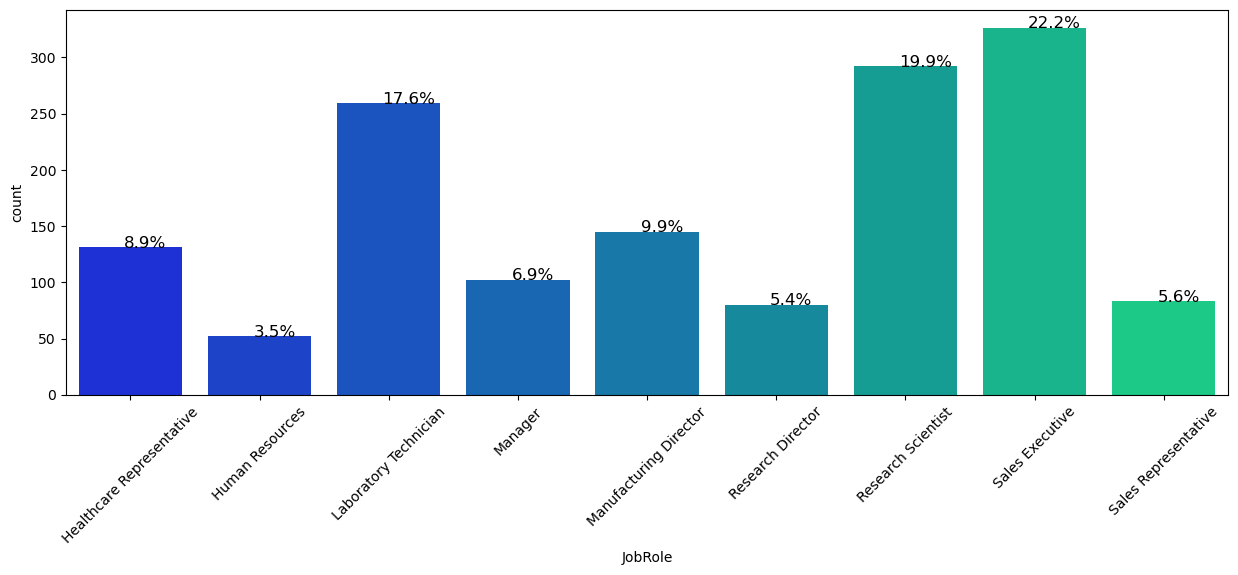

In [40]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JobRole"],palette='winter')
plt.xticks(rotation=45)
perc_on_bar(ax,data["JobRole"])

### Observations on MaritalStatus

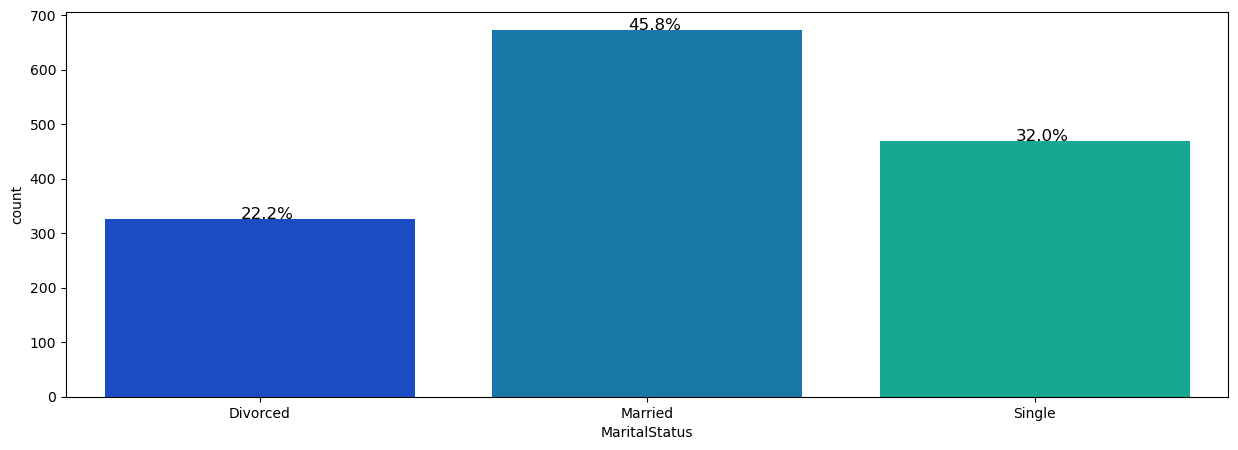

In [41]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["MaritalStatus"],palette='winter')
perc_on_bar(ax,data["MaritalStatus"])

### Observations on OverTime

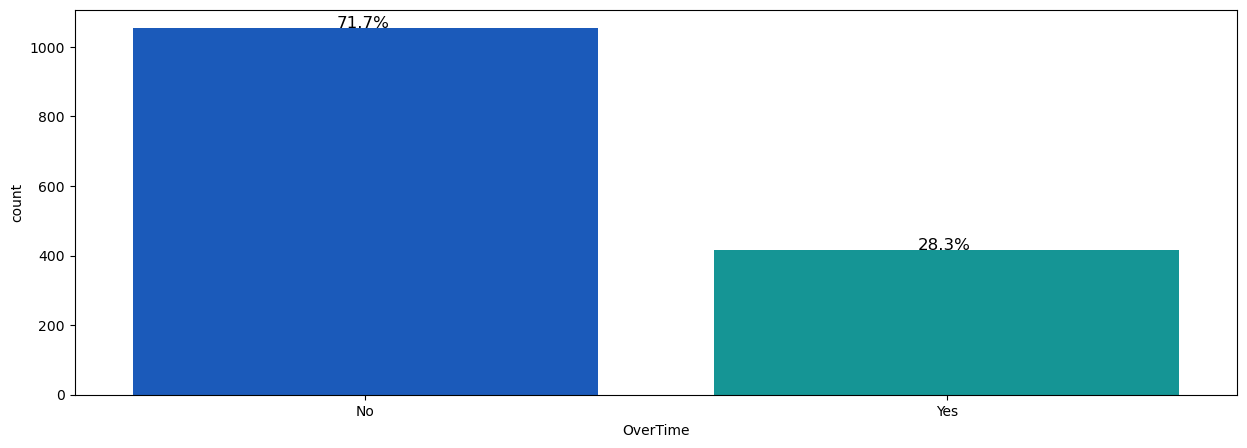

In [42]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["OverTime"],palette='winter')
perc_on_bar(ax,data["OverTime"])

### Observations on Attrition

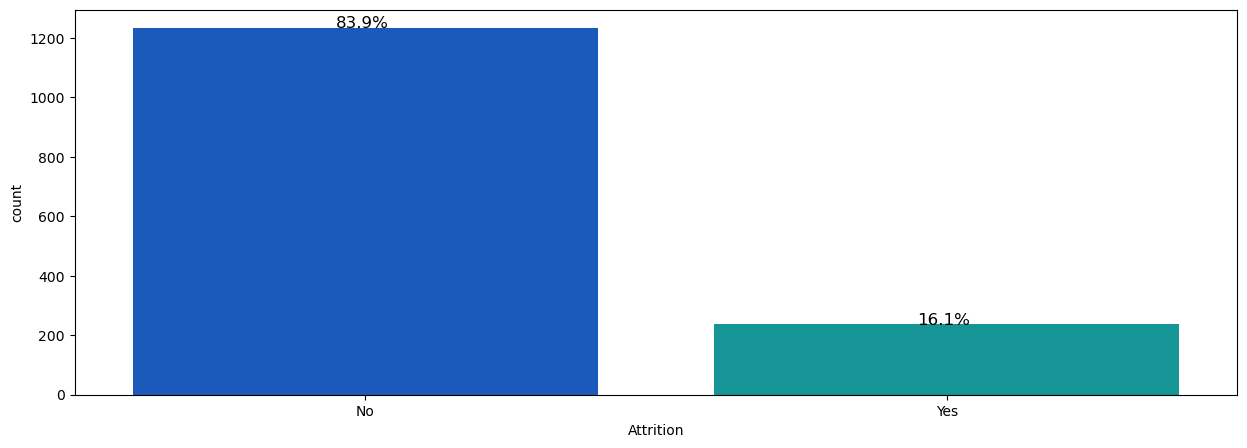

In [43]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Attrition"],palette='winter')
perc_on_bar(ax,data["Attrition"])

# Bivariate Analysis

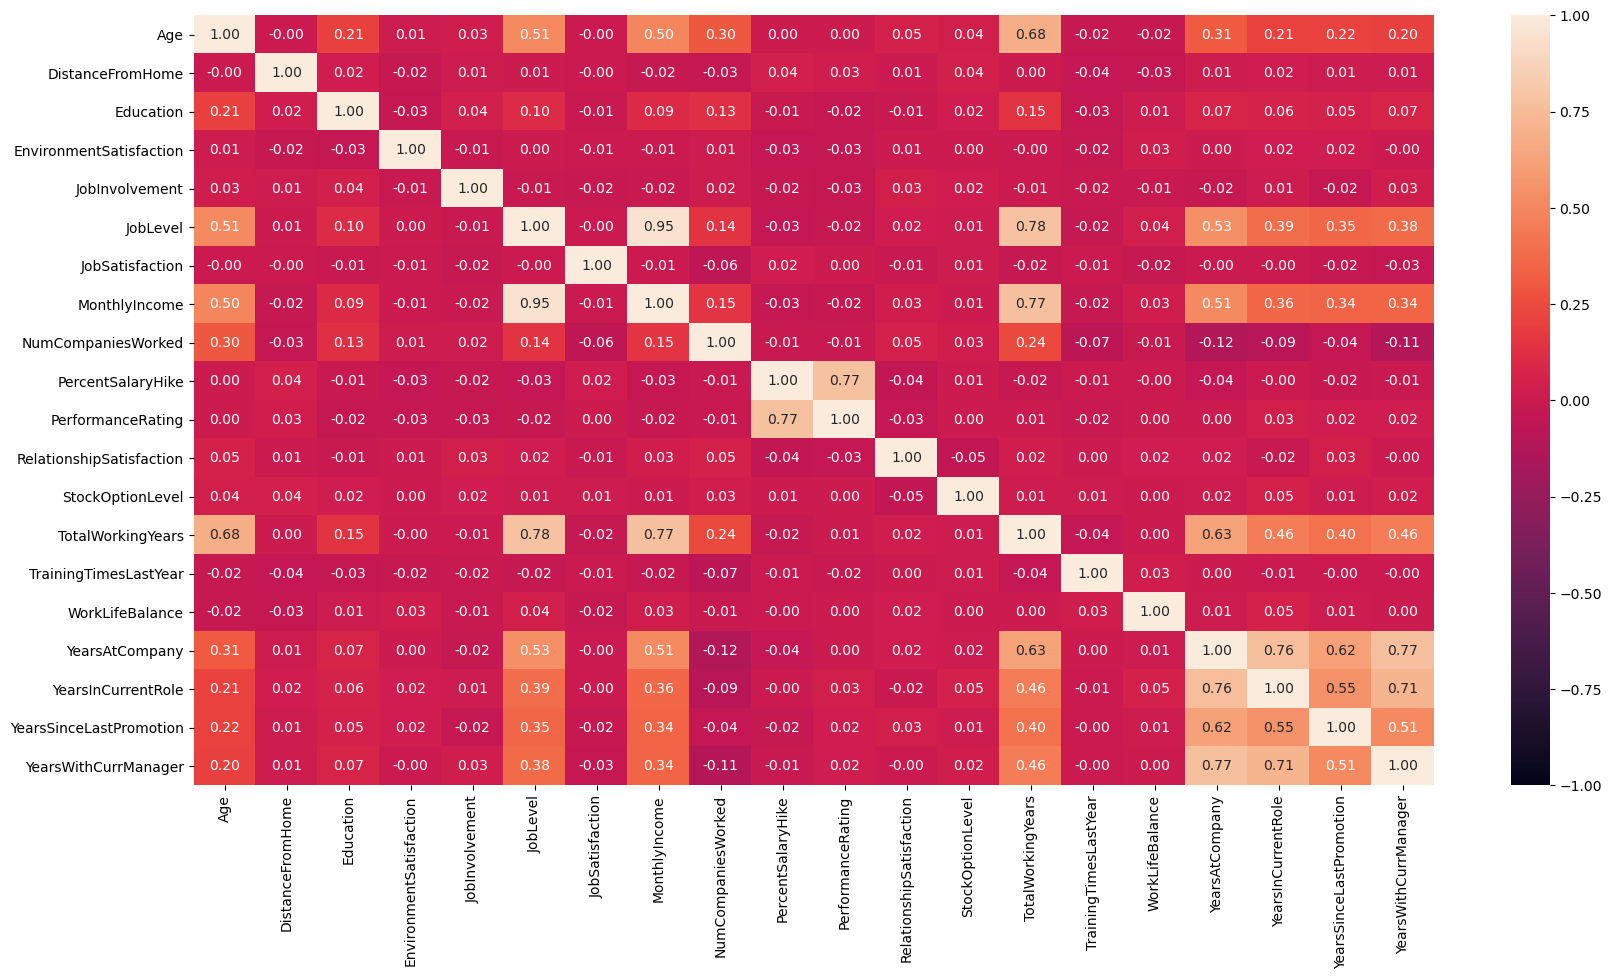

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

## Comparing the target variable with other variables

### Attrition vs Earnings of employee

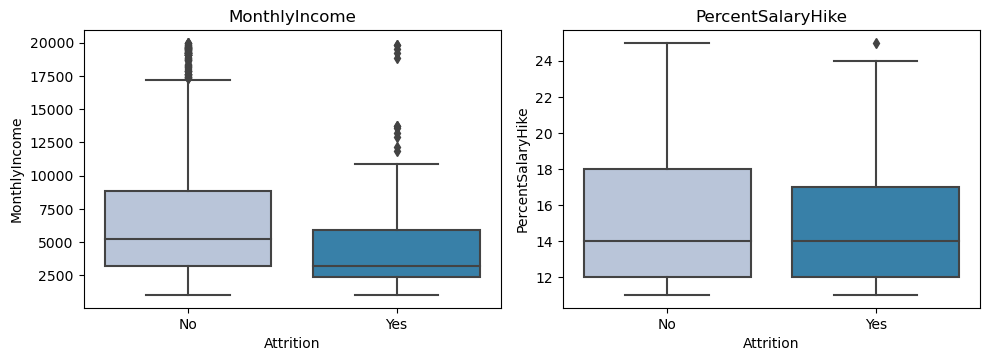

In [45]:
cols = data[['MonthlyIncome','PercentSalaryHike']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Attrition"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### Attrition vs Years working in company

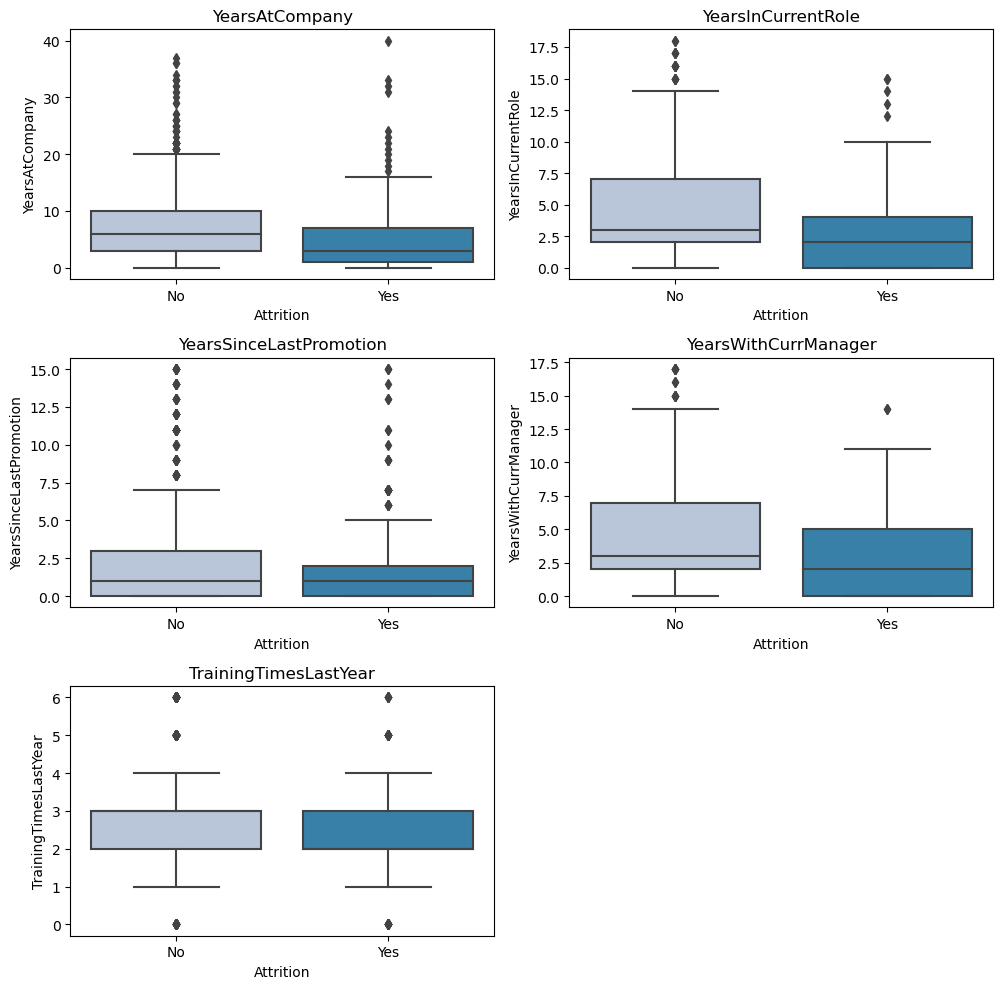

In [46]:
cols = data[['YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager','TrainingTimesLastYear']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Attrition"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### Attrition vs Previous job roles

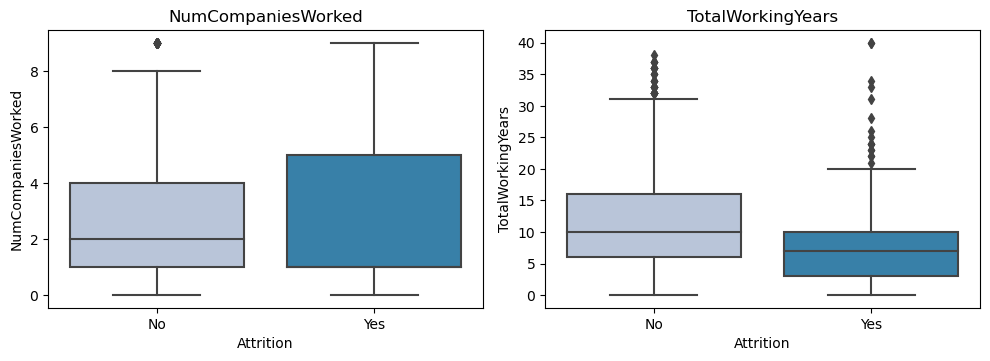

In [47]:
cols = data[['NumCompaniesWorked','TotalWorkingYears']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Attrition"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

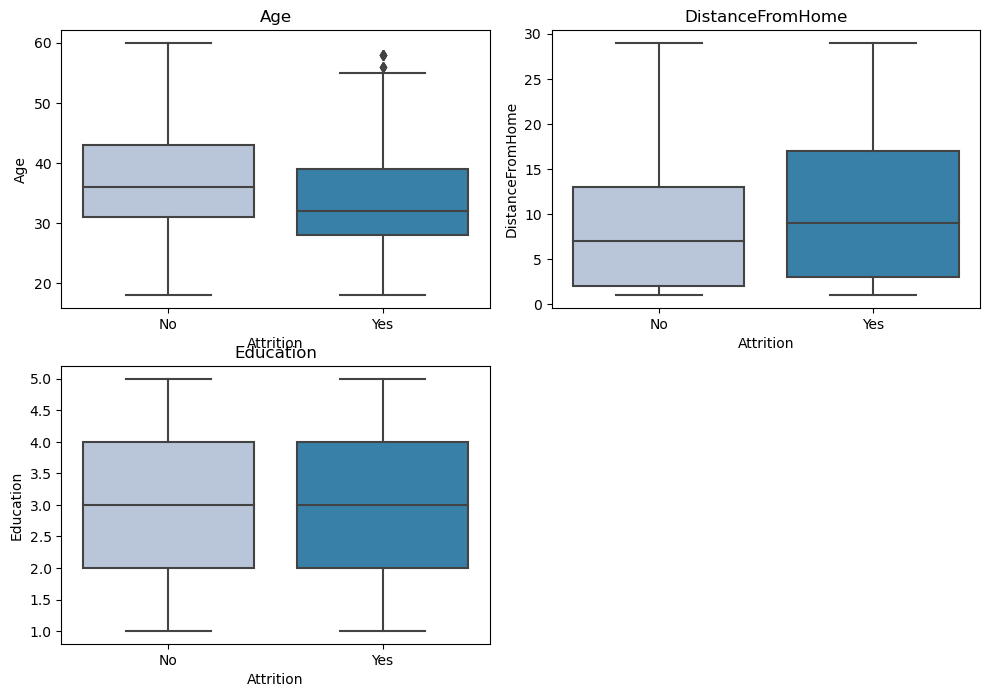

In [48]:
cols = data[['Age','DistanceFromHome','Education']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Attrition"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [49]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Attrition'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['Attrition'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Attrition            No  Yes   All
BusinessTravel                    
Non-Travel          138   12   150
Travel_Frequently   208   69   277
Travel_Rarely       887  156  1043
All                1233  237  1470
------------------------------------------------------------------------------------------------------------------------


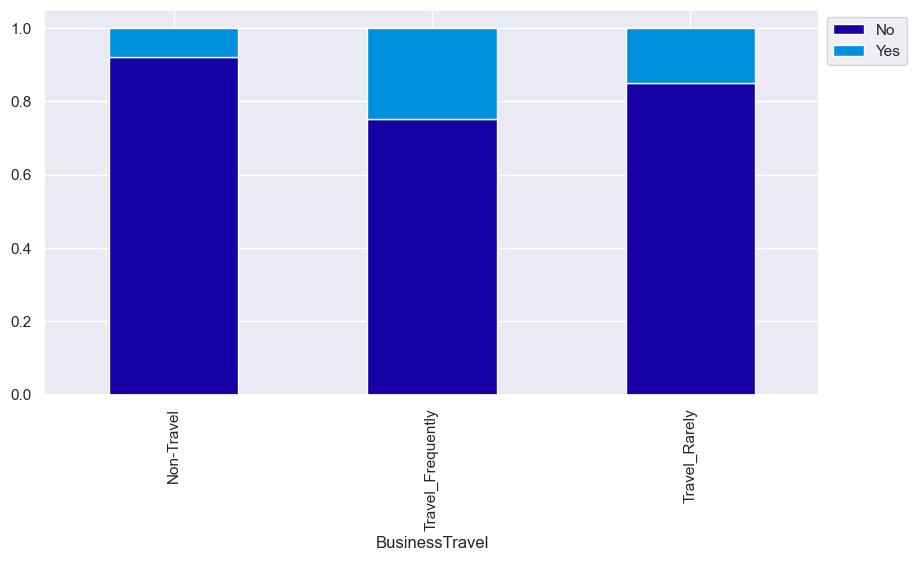

In [50]:
stacked_plot(data['BusinessTravel'])

Attrition                 No  Yes   All
Department                             
Human Resources           51   12    63
Research & Development   828  133   961
Sales                    354   92   446
All                     1233  237  1470
------------------------------------------------------------------------------------------------------------------------


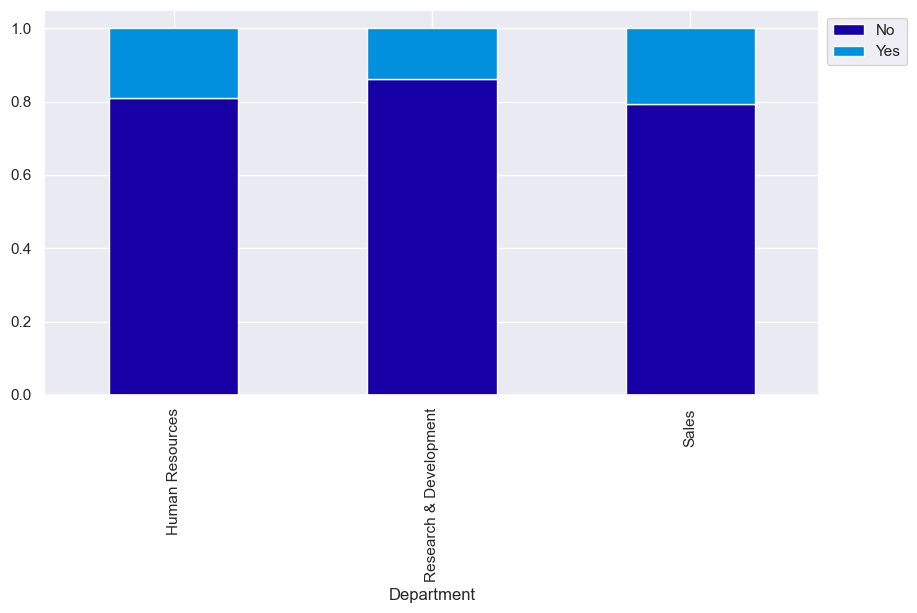

In [51]:
stacked_plot(data['Department'])

Attrition           No  Yes   All
EducationField                   
Human Resources     20    7    27
Life Sciences      517   89   606
Marketing          124   35   159
Medical            401   63   464
Other               71   11    82
Technical Degree   100   32   132
All               1233  237  1470
------------------------------------------------------------------------------------------------------------------------


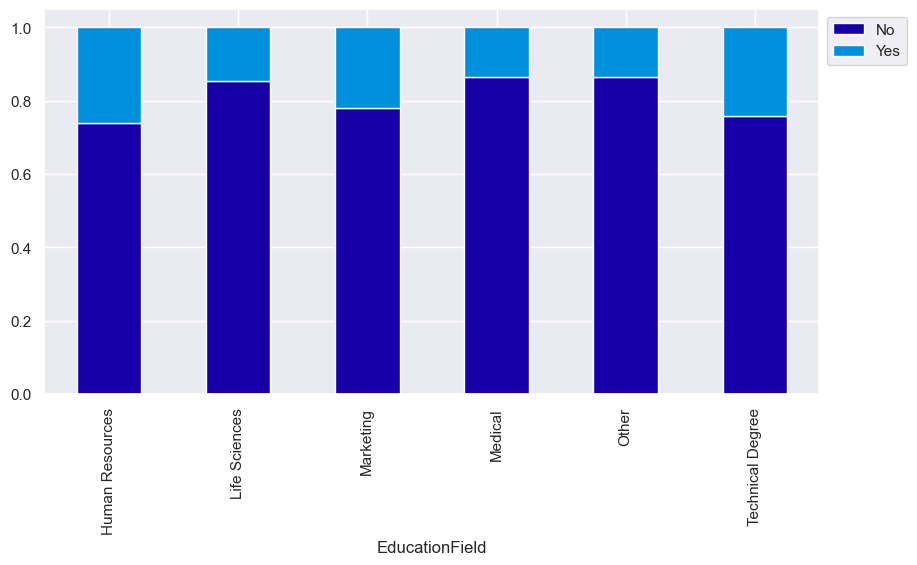

In [52]:
stacked_plot(data['EducationField'])

Attrition                  No  Yes   All
EnvironmentSatisfaction                 
1                         212   72   284
2                         244   43   287
3                         391   62   453
4                         386   60   446
All                      1233  237  1470
------------------------------------------------------------------------------------------------------------------------


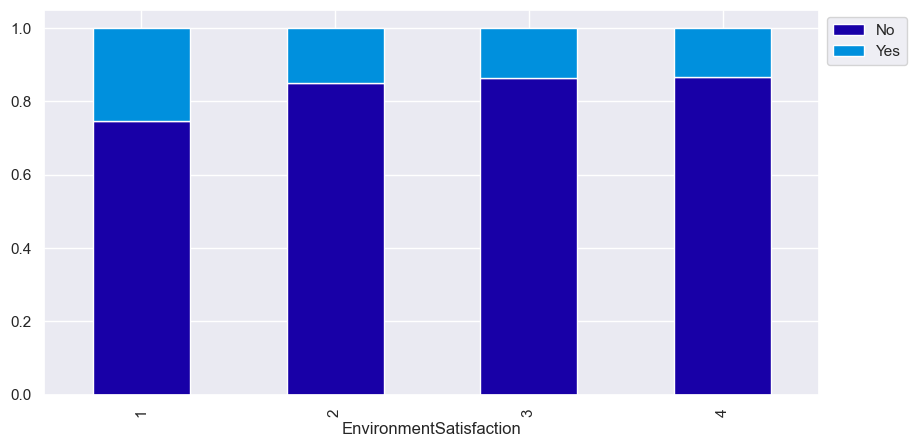

In [53]:
stacked_plot(data['EnvironmentSatisfaction'])

Attrition         No  Yes   All
JobInvolvement                 
1                 55   28    83
2                304   71   375
3                743  125   868
4                131   13   144
All             1233  237  1470
------------------------------------------------------------------------------------------------------------------------


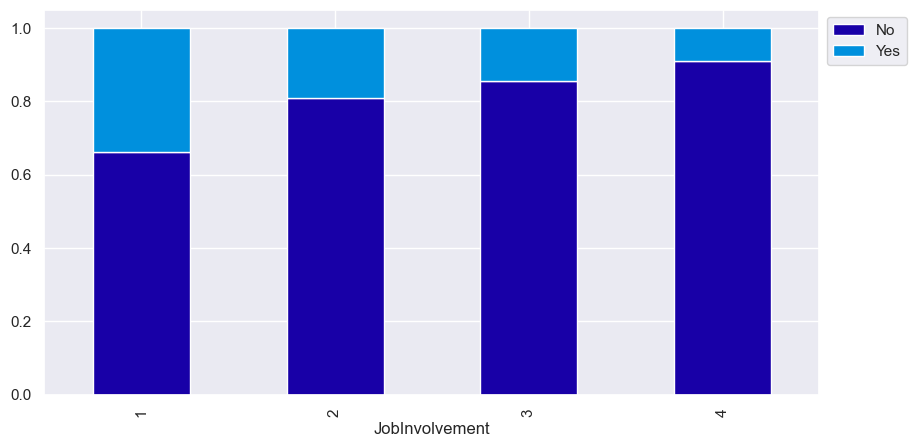

In [54]:
stacked_plot(data['JobInvolvement'])

Attrition    No  Yes   All
JobLevel                  
1           400  143   543
2           482   52   534
3           186   32   218
4           101    5   106
5            64    5    69
All        1233  237  1470
------------------------------------------------------------------------------------------------------------------------


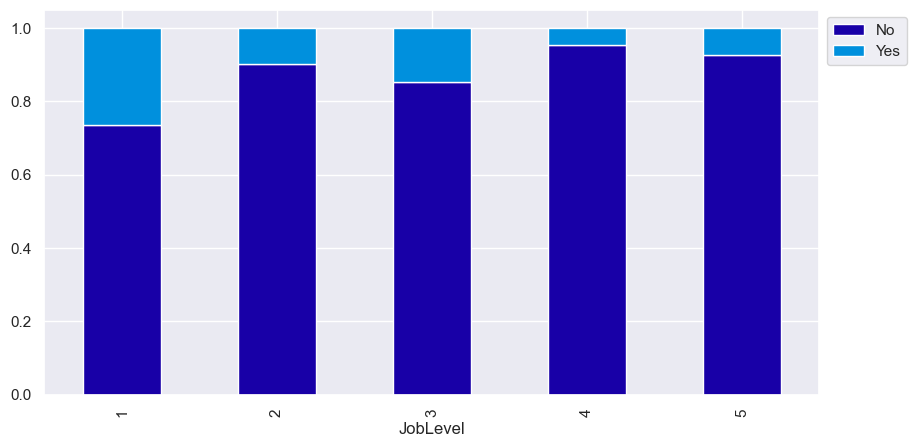

In [55]:
stacked_plot(data['JobLevel'])

Attrition                    No  Yes   All
JobRole                                   
Healthcare Representative   122    9   131
Human Resources              40   12    52
Laboratory Technician       197   62   259
Manager                      97    5   102
Manufacturing Director      135   10   145
Research Director            78    2    80
Research Scientist          245   47   292
Sales Executive             269   57   326
Sales Representative         50   33    83
All                        1233  237  1470
------------------------------------------------------------------------------------------------------------------------


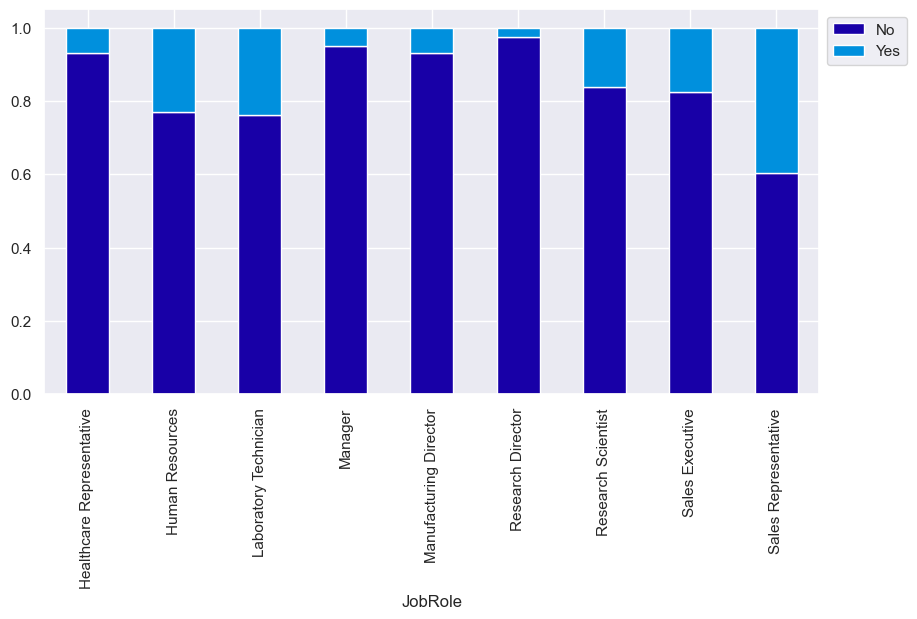

In [56]:
stacked_plot(data['JobRole'])

Attrition          No  Yes   All
JobSatisfaction                 
1                 223   66   289
2                 234   46   280
3                 369   73   442
4                 407   52   459
All              1233  237  1470
------------------------------------------------------------------------------------------------------------------------


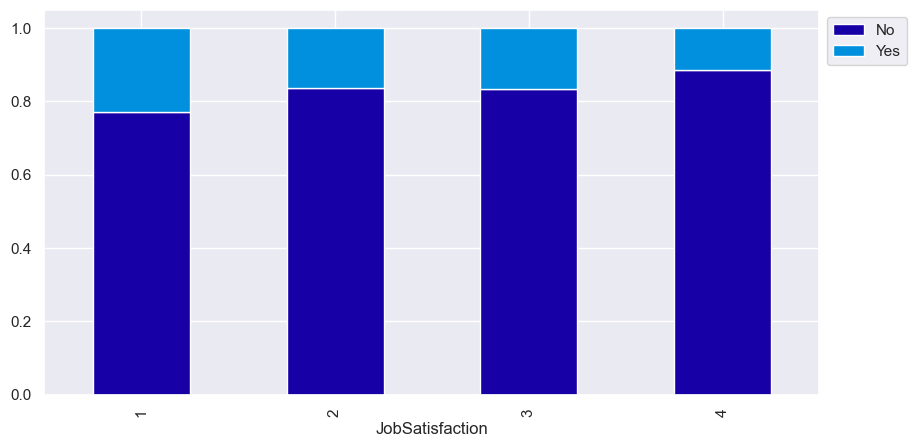

In [57]:
stacked_plot(data['JobSatisfaction'])

Attrition        No  Yes   All
MaritalStatus                 
Divorced        294   33   327
Married         589   84   673
Single          350  120   470
All            1233  237  1470
------------------------------------------------------------------------------------------------------------------------


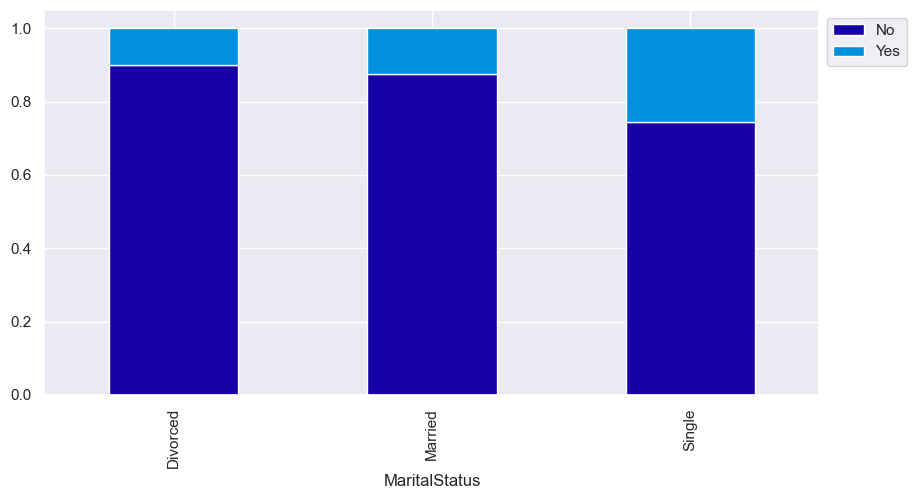

In [58]:
stacked_plot(data['MaritalStatus'])

Attrition    No  Yes   All
OverTime                  
No          944  110  1054
Yes         289  127   416
All        1233  237  1470
------------------------------------------------------------------------------------------------------------------------


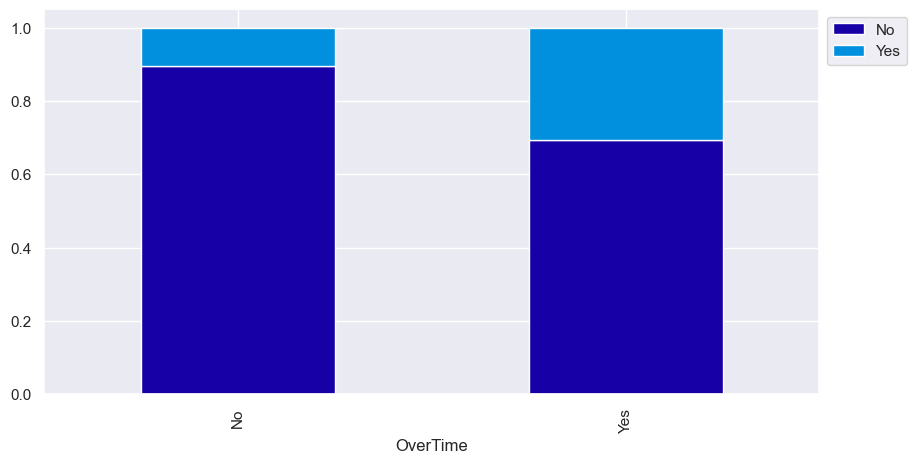

In [59]:
stacked_plot(data['OverTime'])

Attrition                   No  Yes   All
RelationshipSatisfaction                 
1                          219   57   276
2                          258   45   303
3                          388   71   459
4                          368   64   432
All                       1233  237  1470
------------------------------------------------------------------------------------------------------------------------


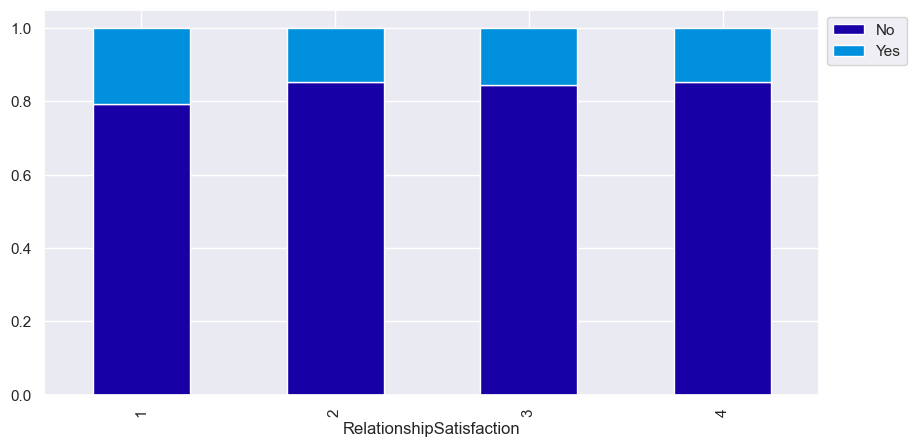

In [60]:
stacked_plot(data['RelationshipSatisfaction'])

Attrition           No  Yes   All
StockOptionLevel                 
0                  477  154   631
1                  540   56   596
2                  146   12   158
3                   70   15    85
All               1233  237  1470
------------------------------------------------------------------------------------------------------------------------


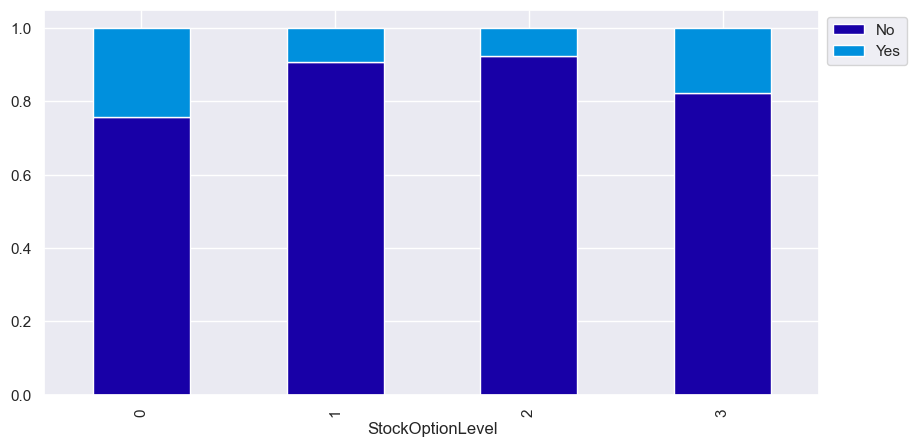

In [61]:
stacked_plot(data['StockOptionLevel'])

Attrition          No  Yes   All
WorkLifeBalance                 
1                  55   25    80
2                 286   58   344
3                 766  127   893
4                 126   27   153
All              1233  237  1470
------------------------------------------------------------------------------------------------------------------------


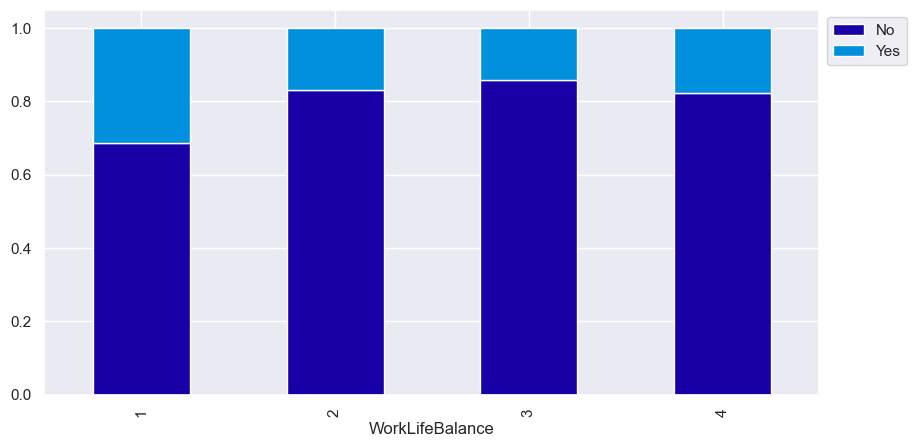

In [62]:
stacked_plot(data['WorkLifeBalance'])

## Checking if performace rating and salary hike are related

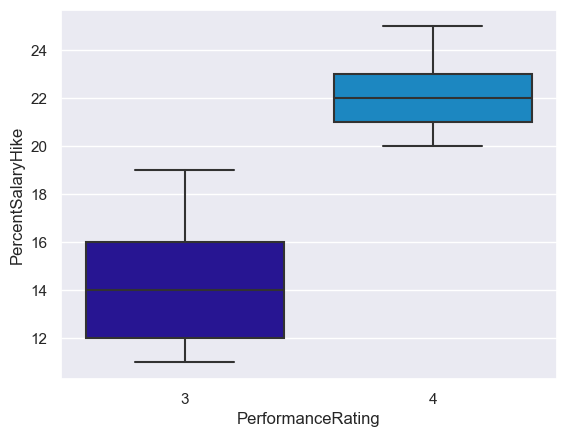

In [63]:
sns.boxplot(data['PerformanceRating'],data['PercentSalaryHike'])
plt.show()

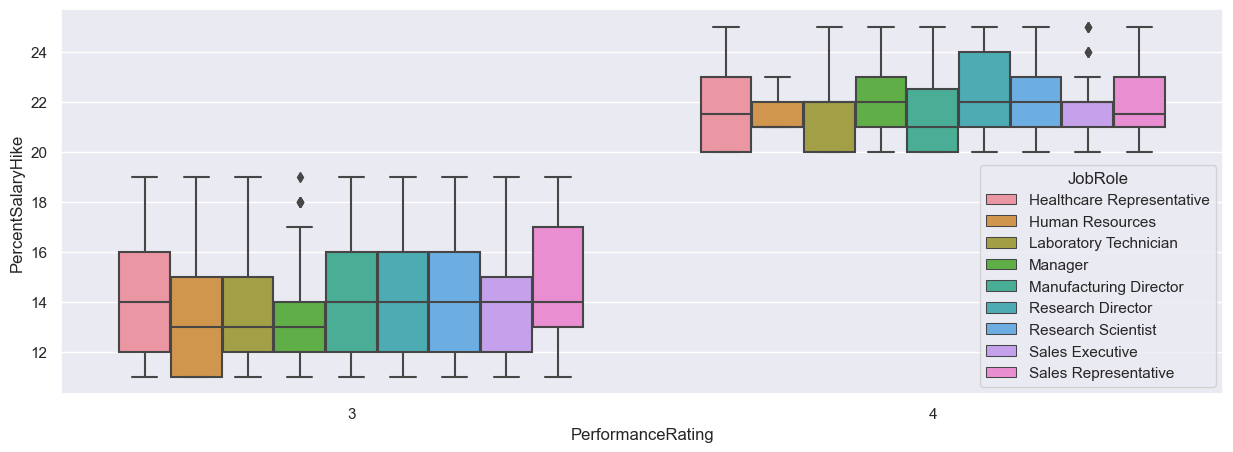

In [64]:
plt.figure(figsize=(15,5))
sns.boxplot(data['PerformanceRating'],data['PercentSalaryHike'],hue=data['JobRole'])
plt.show()

## Model Building Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

### Data Preparation for Model Building

In [65]:
data.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [66]:
# Separating target variable and other variables
X = data.drop(['Attrition'],axis=1)
X = pd.get_dummies(X)

y = data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [67]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test
#X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split the temporary set into train and validation
#X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)
#print(X_train.shape, X_val.shape, X_test.shape)

In [68]:
# Splitting data into training and test set:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_val.shape)

(1029, 48) (441, 48)


In [69]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [70]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Logistic Regression

In [71]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

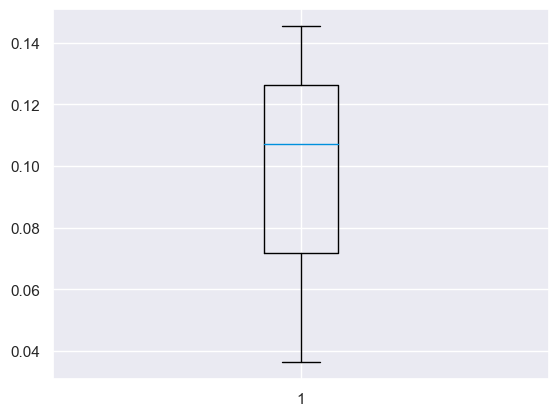

In [72]:
scoring = "recall"
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# Setting number of splits equal to 3
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)

# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

In [73]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.854227,0.144578,0.75,0.242424


In [74]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)

print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.836735,0.084507,0.461538,0.142857


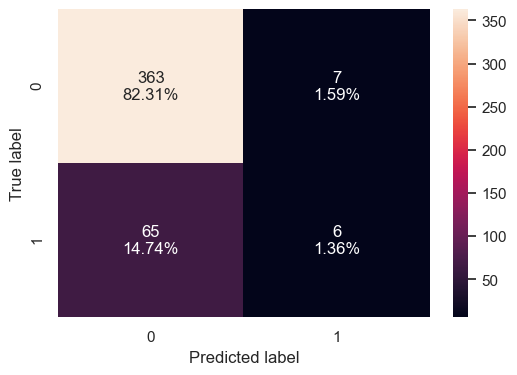

In [75]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

# Oversampling train data using SMOTE (Synthetic Minority Oversampling Technique)

In [76]:
print("Before Over-Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Over-Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
# Synthetic Minority Over Sampling Technique

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Over-Sampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Over-Sampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Over-Sampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Over-Sampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Over-Sampling, counts of label 'Yes': 166
Before Over-Sampling, counts of label 'No': 863 

After Over-Sampling, counts of label 'Yes': 863
After Over-Sampling, counts of label 'No': 863 

After Over-Sampling, the shape of train_X: (1726, 48)
After Over-Sampling, the shape of train_y: (1726,) 



## Logistic Regression on oversampled data

In [77]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

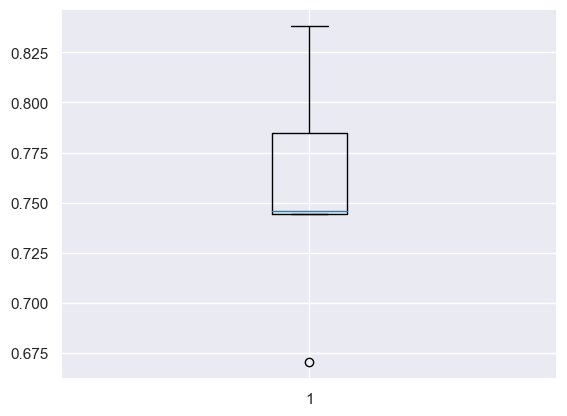

In [78]:
scoring = "recall"

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# Setting number of splits equal to 5

cv_result_over = cross_val_score(
    estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above

plt.boxplot(cv_result_over)
plt.show()

In [79]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)

print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.763036,0.747393,0.771531,0.75927


In [80]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)

print("validation performance:")
log_reg_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.714286,0.492958,0.28,0.357143


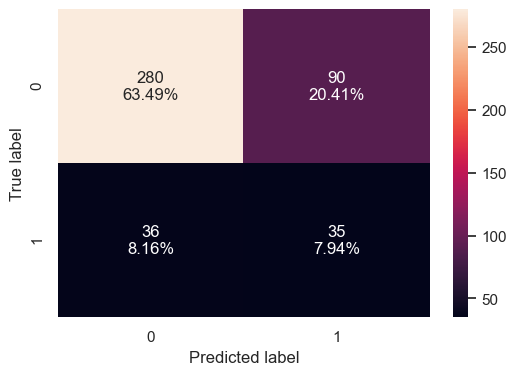

In [81]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

## Regularization

In [82]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1, solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

In [83]:
# Calculating different metrics on train set
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over
)

print("Training performance:")
log_reg_reg_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.502897,0.006952,0.857143,0.013793


In [84]:
# Calculating different metrics on validation set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator, X_val, y_val
)

print("Validation performance:")
log_reg_reg_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.839002,0.0,0.0,0.0


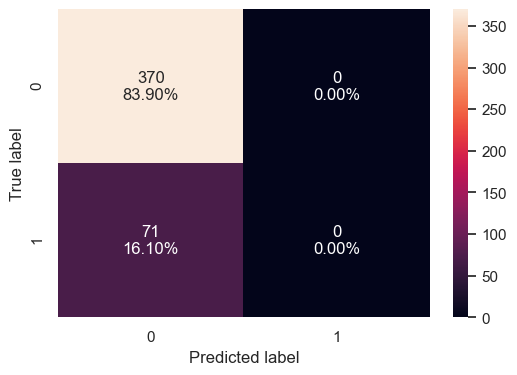

In [85]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator, X_val, y_val)

# Undersampling train data using Random Under Sampler

In [86]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [87]:
print("Before Under-Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under-Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under-Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under-Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under-Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under-Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under-Sampling, counts of label 'Yes': 166
Before Under-Sampling, counts of label 'No': 863 

After Under-Sampling, counts of label 'Yes': 166
After Under-Sampling, counts of label 'No': 166 

After Under-Sampling, the shape of train_X: (332, 48)
After Under-Sampling, the shape of train_y: (332,) 



## Logistic Regression on undersampled data

In [88]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

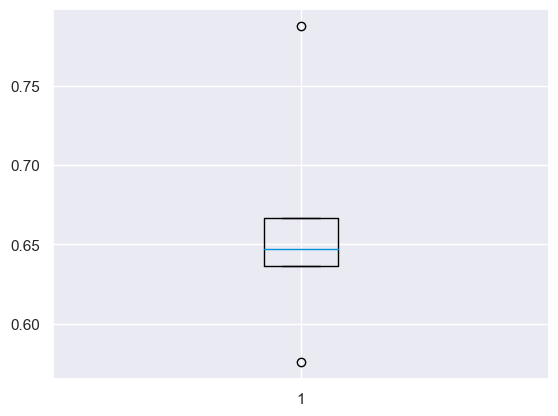

In [89]:
scoring = "recall"
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# Setting number of splits equal to 5

cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above

plt.boxplot(cv_result_under)
plt.show()

In [90]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)

print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.692771,0.680723,0.697531,0.689024


In [91]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)

print("Validation performance:")
log_reg_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.671202,0.633803,0.27439,0.382979


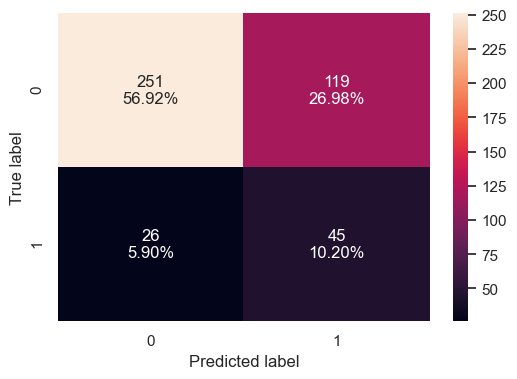

In [92]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

In [93]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_reg_train_perf.T,
        log_reg_under_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression_oversampled data",
    "Regularized Logistic Regression",
    "Logistic Regression_undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression_oversampled data,Regularized Logistic Regression,Logistic Regression_undersampled data
Accuracy,0.854227,0.763036,0.502897,0.692771
Recall,0.144578,0.747393,0.006952,0.680723
Precision,0.750000,0.771531,0.857143,0.697531
F1,0.242424,0.759270,0.013793,0.689024


In [94]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_reg_val_perf.T,
        log_reg_under_val_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression_oversampled data",
    "Regularized Logistic Regression",
    "Logistic Regression_undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression_oversampled data,Regularized Logistic Regression,Logistic Regression_undersampled data
Accuracy,0.836735,0.714286,0.839002,0.671202
Recall,0.084507,0.492958,0.000000,0.633803
Precision,0.461538,0.280000,0.000000,0.274390
F1,0.142857,0.357143,0.000000,0.382979


# Building different Models and Tunning using GridSearch and Randomized Search

In [95]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 19.964349376114082
Random forest: 14.491978609625669
GBM: 32.58467023172905
Adaboost: 40.42780748663102
Xgboost: 33.155080213903744
dtree: 32.53119429590018

Validation Performance:

Bagging: 0.2676056338028169
Random forest: 0.23943661971830985
GBM: 0.39436619718309857
Adaboost: 0.4225352112676056
Xgboost: 0.38028169014084506
dtree: 0.4084507042253521


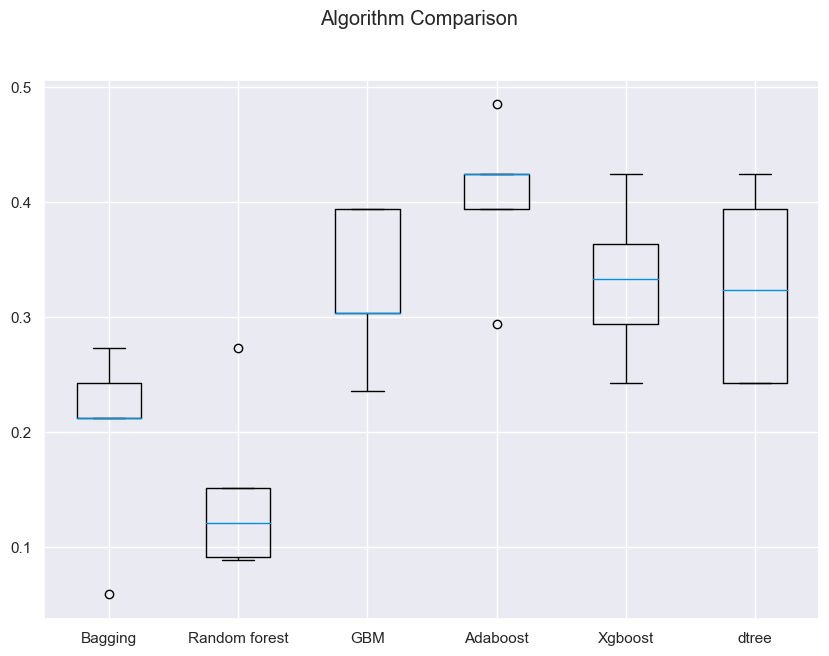

In [96]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## Hyperparameter Tuning
We will tune Adaboost and dtree models using GridSearchCV and RandomizedSearchCV. We will also compare the performance and time taken by these two methods - grid search and randomized search.

In [97]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [98]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Adaboost

### GridSearchCV

In [99]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1), 'learning_rate': 1, 'n_estimators': 90} 
Score: 0.4458110516934046
CPU times: total: 2.66 s
Wall time: 37.8 s


In [100]:
# building model with best parameters
adb_tuned1 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
adb_tuned1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [101]:
# Calculating different metrics on train set
Adaboost_grid_train = model_performance_classification_sklearn(
    adb_tuned1, X_train, y_train
)
print("Training performance:")
Adaboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.913508,0.560241,0.853211,0.676364


In [102]:
# Calculating different metrics on validation set
Adaboost_grid_val = model_performance_classification_sklearn(adb_tuned1, X_val, y_val)
print("Validation performance:")
Adaboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.870748,0.464789,0.634615,0.536585


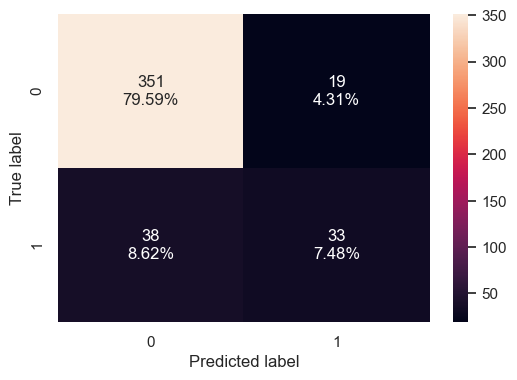

In [103]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned1, X_val, y_val)

## RandomizedSearchCV

In [104]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.4458110516934046:
CPU times: total: 906 ms
Wall time: 12.2 s


In [105]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [106]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
Adaboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.913508,0.560241,0.853211,0.676364


In [107]:
# Calculating different metrics on validation set
Adaboost_random_val = model_performance_classification_sklearn(adb_tuned2, X_val, y_val)
print("Validation performance:")
Adaboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.870748,0.464789,0.634615,0.536585


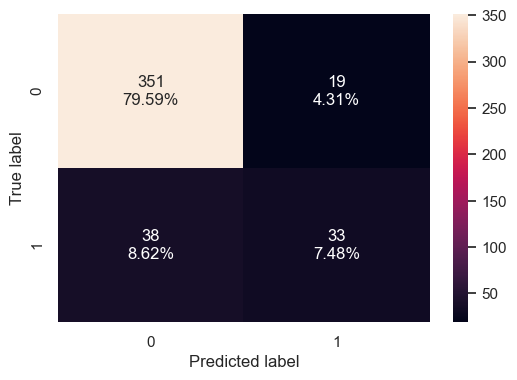

In [108]:
# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_val, y_val)

## XGBoost

### GridSearchCV

In [109]:
%%time 

#defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in GridSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters are {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100, 'reg_lambda': 5, 'scale_pos_weight': 10, 'subsample': 1} with CV score=0.9757575757575758:
CPU times: total: 32 s
Wall time: 5min 7s


In [110]:
# building model with best parameters
xgb_tuned1 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=10,
    subsample=1,
    learning_rate=0.01,
    gamma=0,
    eval_metric="logloss",
    reg_lambda=5,
    max_depth=1,
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=1, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [111]:
# Calculating different metrics on train set
xgboost_grid_train = model_performance_classification_sklearn(
    xgb_tuned1, X_train, y_train
)
print("Training performance:")
xgboost_grid_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.212828,0.993976,0.169405,0.289474


In [112]:
# Calculating different metrics on validation set
xgboost_grid_val = model_performance_classification_sklearn(xgb_tuned1, X_val, y_val)
print("Validation performance:")
xgboost_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.210884,1.0,0.169451,0.289796


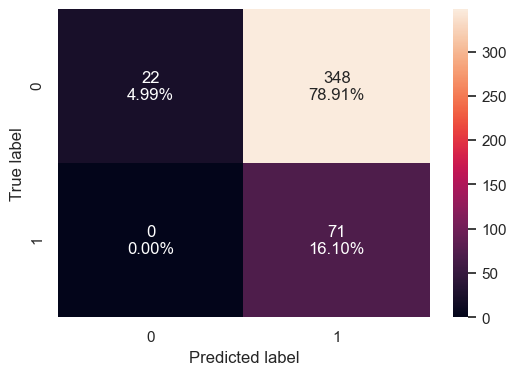

In [113]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned1, X_val, y_val)

### RandomizedSearchCV

In [114]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9698752228163994:
CPU times: total: 1.03 s
Wall time: 7.35 s


In [115]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=50,
    scale_pos_weight=10,
    gamma=1,
    subsample=0.9,
    learning_rate=0.01,
    eval_metric="logloss",
    max_depth=1,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=1, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [116]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.208941,0.993976,0.168712,0.288462


In [117]:
# Calculating different metrics on validation set
xgboost_random_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgboost_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.204082,1.0,0.168246,0.288032


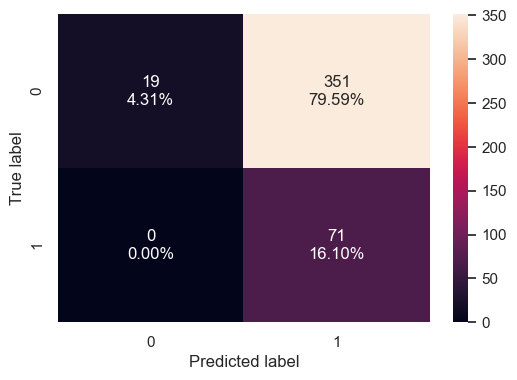

In [118]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

## D-Tree 

### GridSearch 

In [119]:
%%time 

#defining model
model = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})


# Grid of parameters to choose from
param_grid = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1, verbose= 2)
grid_cv = grid_cv.fit(X_train, y_train)
                               
# Set the clf to the best combination of parameters
estimator = grid_cv.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters are {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'log2', 'min_impurity_decrease': 1e-06, 'splitter': 'best'} with CV score=1.0:
CPU times: total: 1.12 s
Wall time: 2.82 s


In [120]:

# Calculating different metrics on train set
dtree_random_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
print("Training performance:")
dtree_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.210884,1.0,0.169734,0.29021


In [121]:
# Calculating different metrics on validation set
dtree_random_val = model_performance_classification_sklearn(estimator, X_val, y_val)
print("Validation performance:")
dtree_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.217687,0.971831,0.167476,0.285714


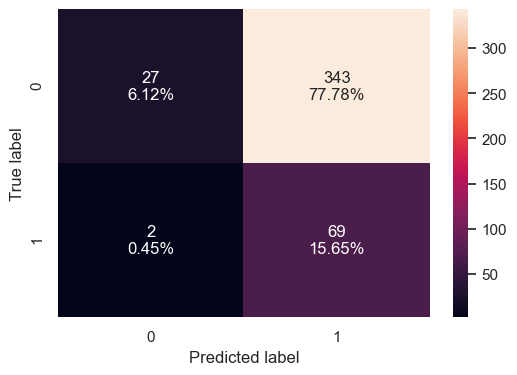

In [122]:
# creating confusion matrix
confusion_matrix_sklearn(estimator, X_val, y_val)

### RandomizedSearch

In [123]:
%%time

#defining model
model = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})


# Grid of parameters to choose from
param_grid = {
    "max_depth": np.arange(1, 10),
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
    "max_features": ["log2", "sqrt"],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)                             


#Calling RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
random_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(random_cv.best_params_,random_cv.best_score_))

Best parameters are {'splitter': 'best', 'min_impurity_decrease': 0.0001, 'max_features': 'log2', 'max_depth': 1, 'criterion': 'entropy'} with CV score=1.0:
CPU times: total: 438 ms
Wall time: 774 ms


In [124]:

# Calculating different metrics on train set
dtree_random_train = model_performance_classification_sklearn(
    random_cv, X_train, y_train
)
print("Training performance:")
dtree_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.210884,1.0,0.169734,0.29021


In [125]:
# Calculating different metrics on validation set
dtree_random_val = model_performance_classification_sklearn(random_cv, X_val, y_val)
print("Validation performance:")
dtree_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.217687,0.971831,0.167476,0.285714


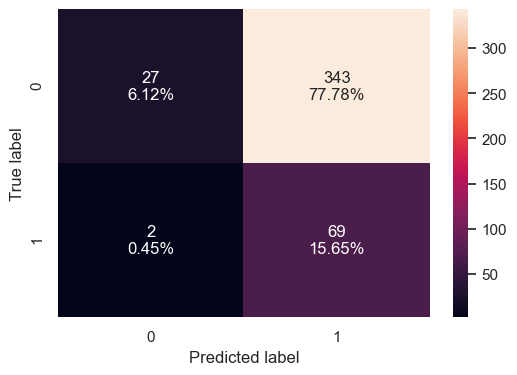

In [126]:
# creating confusion matrix
confusion_matrix_sklearn(random_cv, X_val, y_val)

In [127]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)

    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)

    train_recall = metrics.recall_score(y_train, pred_train)
    val_recall = metrics.recall_score(y_val, pred_val)

    train_precision = metrics.precision_score(y_train, pred_train)
    val_precision = metrics.precision_score(y_val, pred_val)

    train_f1 = f1_score(y_train, pred_train)
    val_f1 = f1_score(y_val, pred_val)

    score_list.extend(
        (
            train_acc,
            val_acc,
            train_recall,
            val_recall,
            train_precision,
            val_precision,
            train_f1,
            val_f1,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on validation set : ", model.score(X_val, y_val))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on validation set : ", metrics.recall_score(y_val, pred_val))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on validition set : ", metrics.precision_score(y_val, pred_val))
        print("F1-Score on training set : ", metrics.f1_score(y_train, pred_train))
        print("F1-Score on validation set : ", metrics.f1_score(y_val, pred_val))

    return score_list  # returning the list with train and test scores

In [128]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    
    """
    y_predict = model.predict(X_val)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Random Forest Classifier

Accuracy on training set :  1.0
Accuracy on validation set :  0.8707482993197279
Recall on training set :  1.0
Recall on validation set :  0.23943661971830985
Precision on training set :  1.0
Precision on validition set :  0.85
F1-Score on training set :  1.0
F1-Score on validation set :  0.3736263736263736


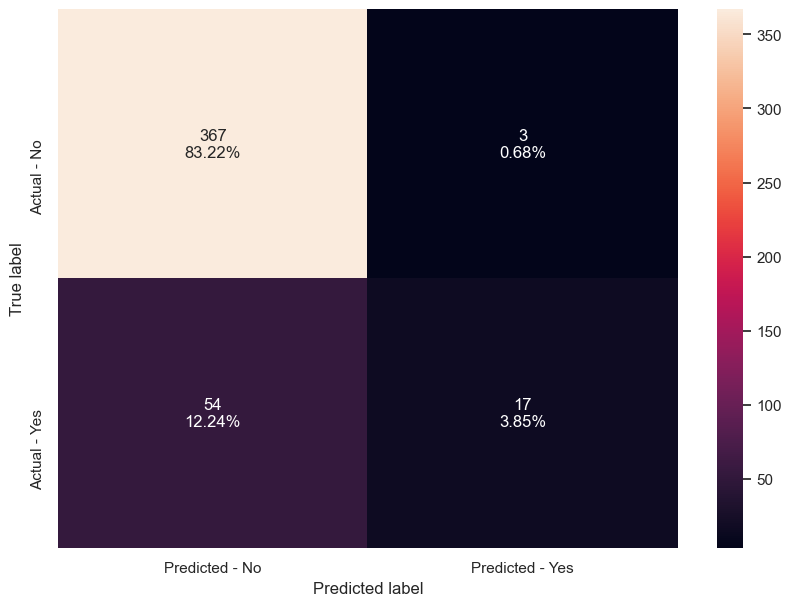

In [129]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(rf_estimator)

# Creating confusion matrix
make_confusion_matrix(rf_estimator, y_val)

## Random Forest Classifier Tuning (Gridsearch)

In [130]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    class_weight={0: 0.81, 1: 0.19}, random_state=1, oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(5, 30, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(1, 15, 5),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 110, 10),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.81, 1: 0.19}, max_depth=15,
                       max_features=None, n_estimators=30, oob_score=True,
                       random_state=1)

Accuracy on training set :  0.9990281827016521
Accuracy on validation set :  0.8639455782312925
Recall on training set :  0.9939759036144579
Recall on validation set :  0.39436619718309857
Precision on training set :  1.0
Precision on validition set :  0.6222222222222222
F1-Score on training set :  0.9969788519637462
F1-Score on validation set :  0.4827586206896552


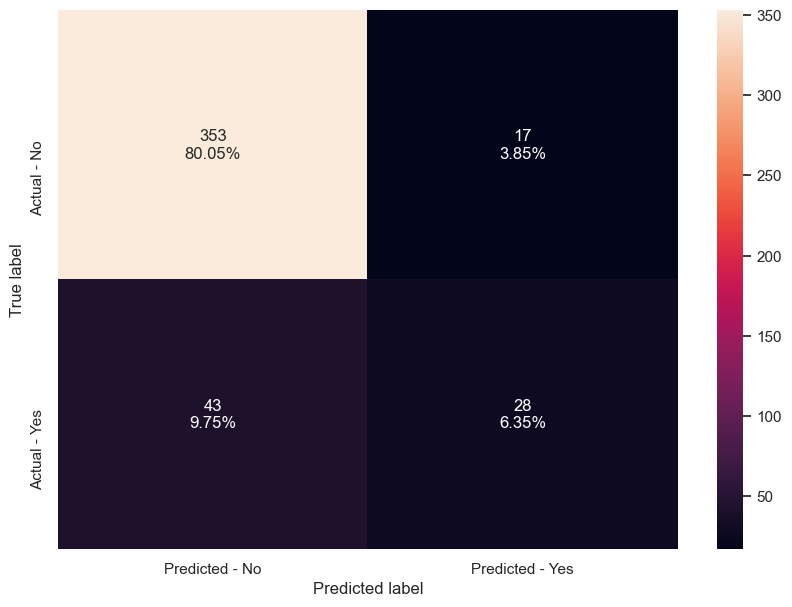

In [131]:
# Calculating different metrics
get_metrics_score(rf_tuned)

# Creating confusion matrix
make_confusion_matrix(rf_tuned, y_val)

## Bagging Classifier

Accuracy on training set :  0.9854227405247813
Accuracy on validation set :  0.8526077097505669
Recall on training set :  0.9096385542168675
Recall on validation set :  0.2676056338028169
Precision on training set :  1.0
Precision on validition set :  0.59375
F1-Score on training set :  0.9526813880126183
F1-Score on validation set :  0.36893203883495146


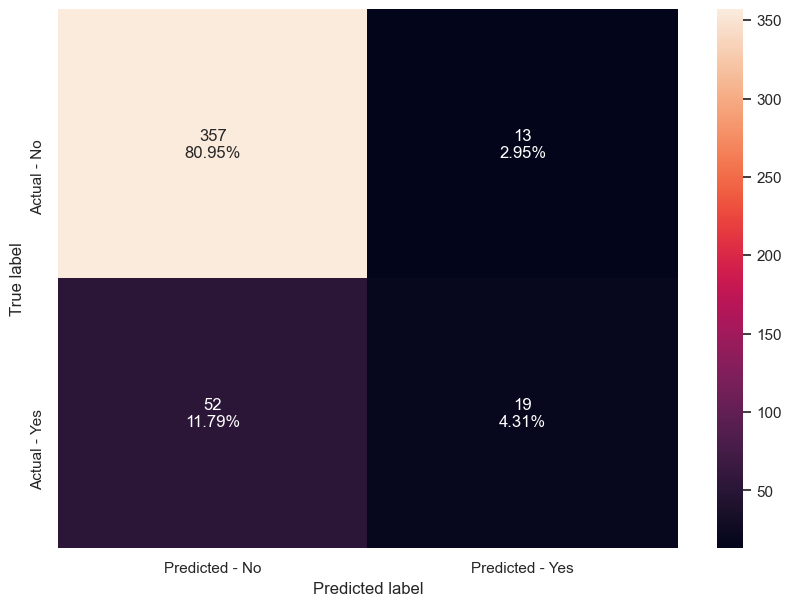

In [132]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(bagging_classifier)

# Creating confusion matrix
make_confusion_matrix(bagging_classifier, y_val)

## Bagging Classifier - Hyperparameter Tuning

In [133]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(
    bagging_estimator_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1
)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, random_state=1)

Accuracy on training set :  0.9786200194363459
Accuracy on validation set :  0.8639455782312925
Recall on training set :  0.8734939759036144
Recall on validation set :  0.29577464788732394
Precision on training set :  0.9931506849315068
Precision on validition set :  0.6774193548387096
F1-Score on training set :  0.9294871794871794
F1-Score on validation set :  0.411764705882353


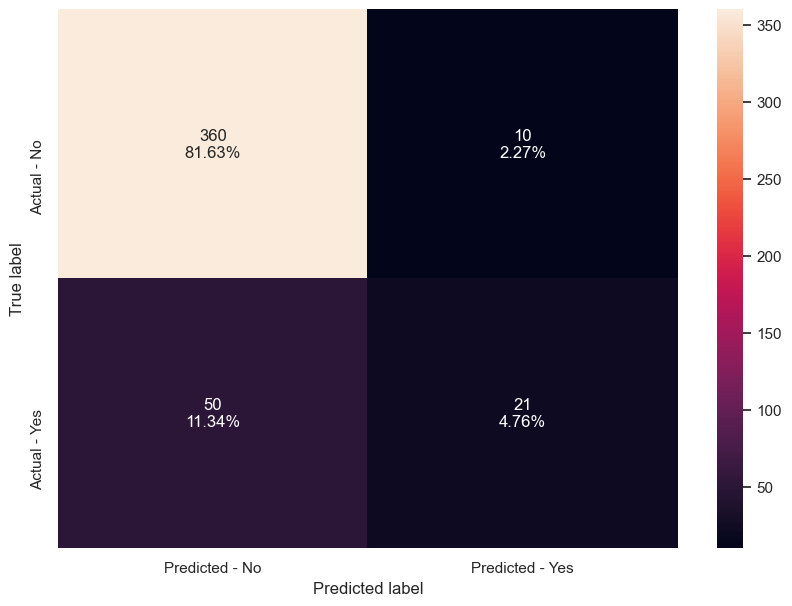

In [134]:
# Calculating different metrics
get_metrics_score(bagging_estimator_tuned)

# Creating confusion matrix
make_confusion_matrix(bagging_estimator_tuned, y_val)

## Gradient Boosting Classifier

Accuracy on training set :  0.9601554907677357
Accuracy on validation set :  0.873015873015873
Recall on training set :  0.7590361445783133
Recall on validation set :  0.39436619718309857
Precision on training set :  0.9921259842519685
Precision on validition set :  0.6829268292682927
F1-Score on training set :  0.8600682593856656
F1-Score on validation set :  0.5


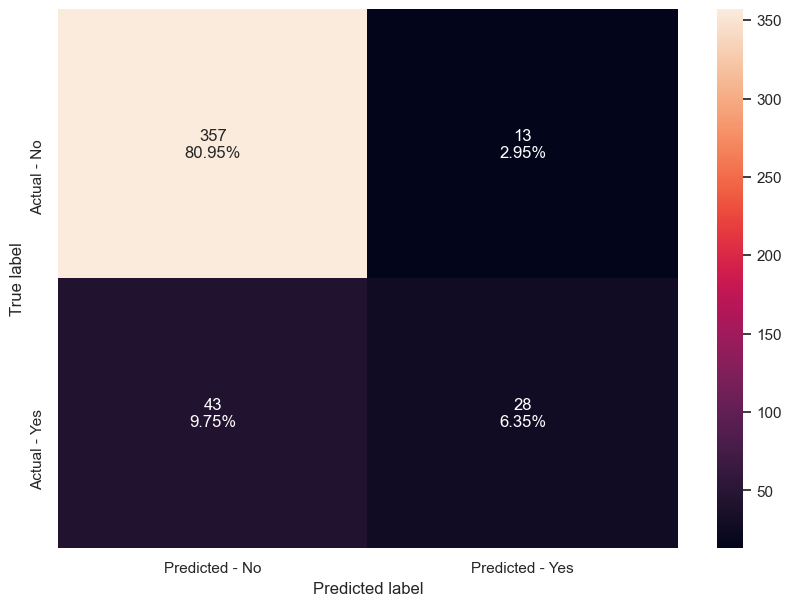

In [135]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(gb_classifier)

# Creating confusion matrix
make_confusion_matrix(gb_classifier, y_val)

## Gradient Boosting Classifier with Gridsearch

In [136]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.8)

Accuracy on training set :  0.9854227405247813
Accuracy on validation set :  0.8775510204081632
Recall on training set :  0.9096385542168675
Recall on validation set :  0.43661971830985913
Precision on training set :  1.0
Precision on validition set :  0.6888888888888889
F1-Score on training set :  0.9526813880126183
F1-Score on validation set :  0.5344827586206896


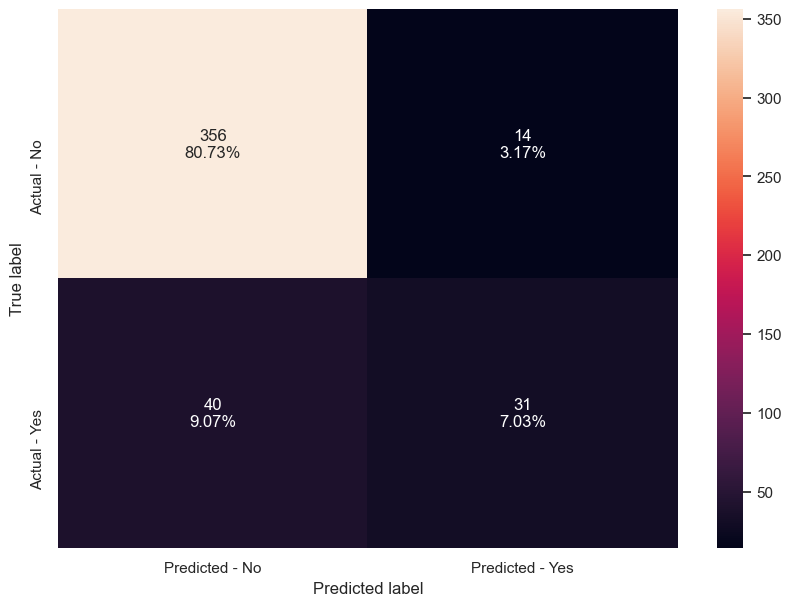

In [137]:
# Calculating different metrics
get_metrics_score(gbc_tuned)

# Creating confusion matrix
make_confusion_matrix(gbc_tuned, y_val)

## Decision Tree classifier

Accuracy on training set :  1.0
Accuracy on validation set :  0.780045351473923
Recall on training set :  1.0
Recall on validation set :  0.4084507042253521
Precision on training set :  1.0
Precision on validition set :  0.34523809523809523
F1-Score on training set :  1.0
F1-Score on validation set :  0.37419354838709673


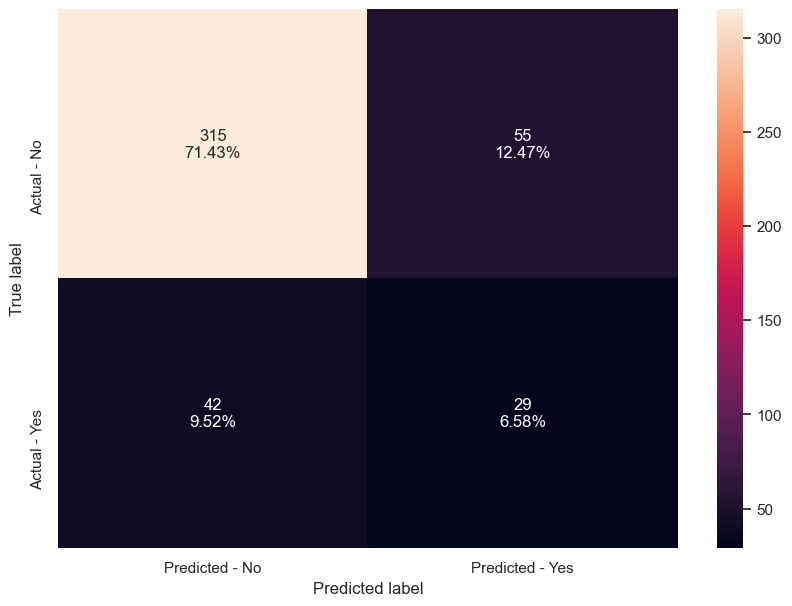

In [138]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(d_tree)

# Creating confusion matrix
make_confusion_matrix(d_tree, y_val)

## Desicion Tree Tuning (GridSearch)

In [139]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.81, 1: 0.19}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.81, 1: 0.19}, max_depth=7,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       min_samples_leaf=5, random_state=1)

Accuracy on training set :  0.86977648202138
Accuracy on validation set :  0.8503401360544217
Recall on training set :  0.21084337349397592
Recall on validation set :  0.2112676056338028
Precision on training set :  0.9210526315789473
Precision on validition set :  0.6
F1-Score on training set :  0.34313725490196084
F1-Score on validation set :  0.3125


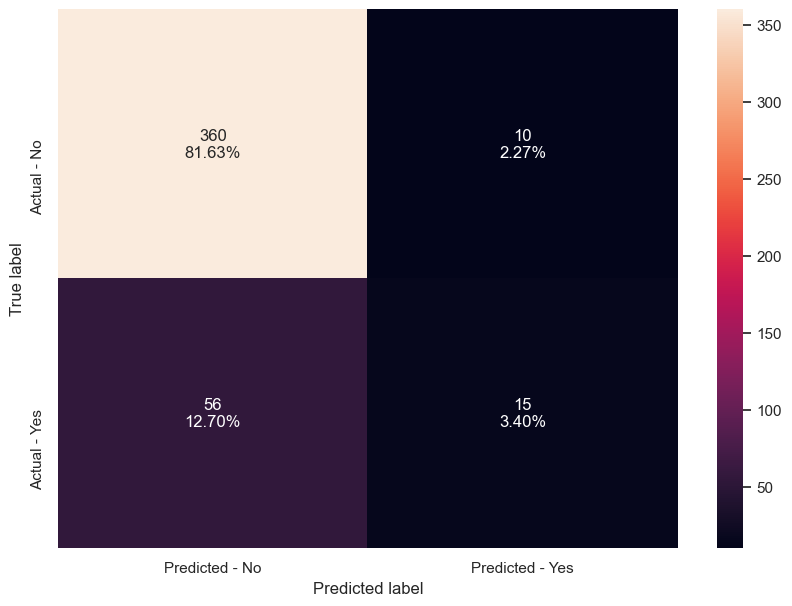

In [140]:
get_metrics_score(dtree_estimator)

make_confusion_matrix(dtree_estimator, y_val)

## XGBoost Classifier

Accuracy on training set :  1.0
Accuracy on validation set :  0.8571428571428571
Recall on training set :  1.0
Recall on validation set :  0.38028169014084506
Precision on training set :  1.0
Precision on validition set :  0.5869565217391305
F1-Score on training set :  1.0
F1-Score on validation set :  0.4615384615384615


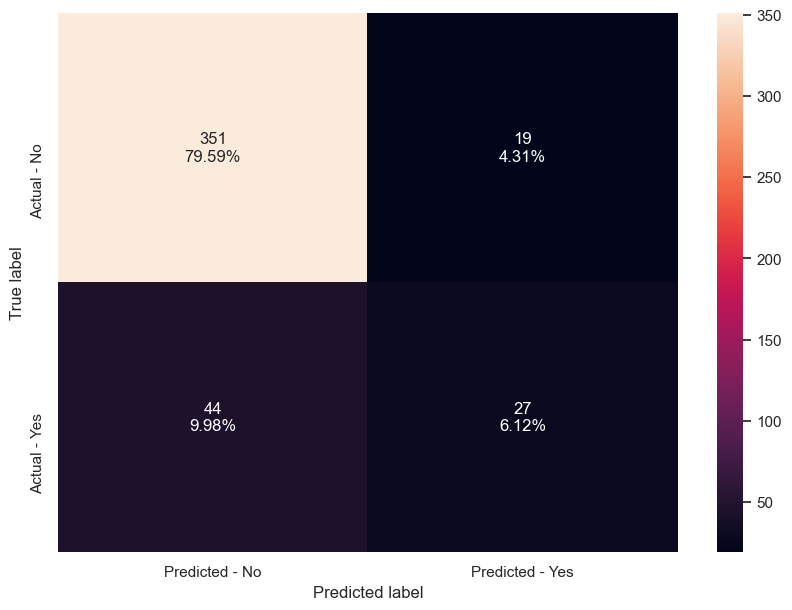

In [141]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss", nthread=-1)
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
get_metrics_score(xgb_classifier)

# Creating confusion matrix
make_confusion_matrix(xgb_classifier, y_val)

##  XGBoost Classifier - Hyperparameter Tuning

In [142]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

Accuracy on training set :  0.9280855199222546
Accuracy on validation set :  0.7755102040816326
Recall on training set :  0.8795180722891566
Recall on validation set :  0.5492957746478874
Precision on training set :  0.73
Precision on validition set :  0.36792452830188677
F1-Score on training set :  0.7978142076502732
F1-Score on validation set :  0.44067796610169496


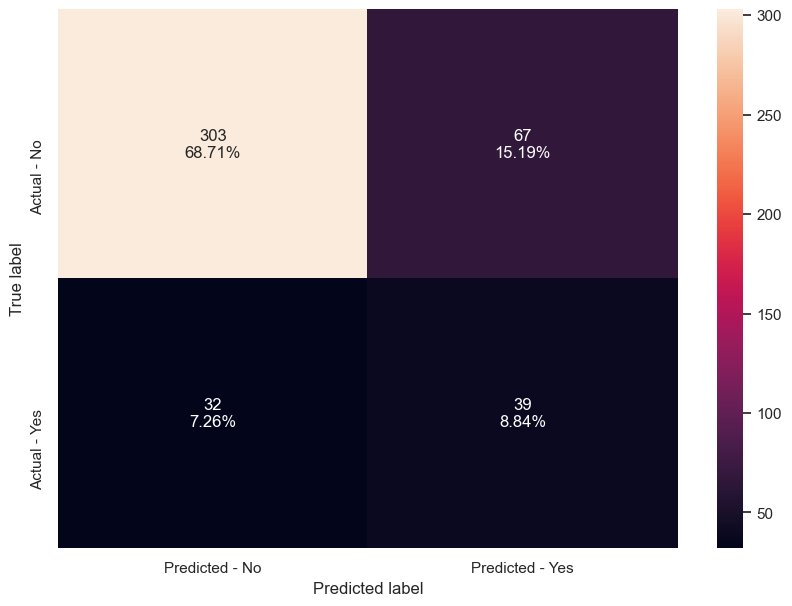

In [143]:
# Calculating different metrics
get_metrics_score(xgb_tuned)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned, y_val)

## Stacking Classifier

In [144]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.81,
                                                                     1: 0.19},
                                                       max_depth=15,
                                                       max_features=None,
                                                       n_estimators=30,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
                                Deci...
                                                 feature_types=None, gamma=0,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.05,
                                                 max_bin=256,
                                                 max_cat_threshold=64,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=10, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, ...))

Accuracy on training set :  0.9611273080660836
Accuracy on validation set :  0.7596371882086168
Recall on training set :  0.9819277108433735
Recall on validation set :  0.7183098591549296
Precision on training set :  0.815
Precision on validition set :  0.3722627737226277
F1-Score on training set :  0.8907103825136612
F1-Score on validation set :  0.4903846153846154


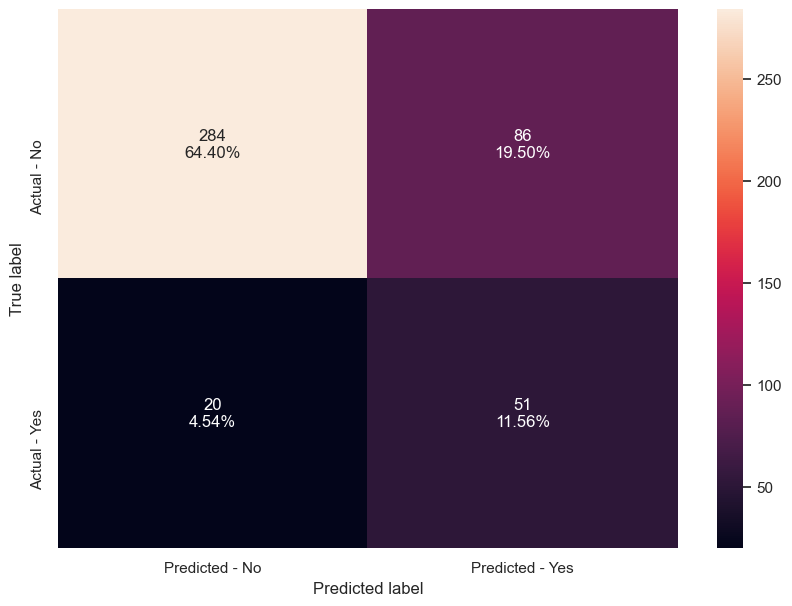

In [145]:
# Calculating different metrics
get_metrics_score(stacking_classifier)

# Creating confusion matrix
make_confusion_matrix(stacking_classifier, y_val)

In [146]:
# defining list of models
models = [
    d_tree,
    dtree_estimator,
    rf_estimator,
    rf_tuned,
    bagging_classifier,
    bagging_estimator_tuned,
    gb_classifier,
    gbc_tuned,
    xgb_classifier,
    xgb_tuned,
    stacking_classifier,
]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
recall_train = []
recall_val = []
precision_train = []
precision_val = []
f1_train = []
f1_val = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_val.append(j[1])
    recall_train.append(j[2])
    recall_val.append(j[3])
    precision_train.append(j[4])
    precision_val.append(j[5])
    f1_train.append(j[6])
    f1_val.append(j[7])

In [147]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree",
            "Tuned Decision Tree",
            "Random Forest",
            "Tuned Random Forest",
            "Bagging Classifier",
            "Bagging Classifier Tuned",
            "Gradient Boosting Classifier",
            "Tuned Gradient Boosting Classifier",
            "XGBoost Classifier",
            "Tuned XGBoost Classifier",
            "Stacking Classifier",
        ],
        "Train_Accuracy": acc_train,
        "Val_Accuracy": acc_val,
        "Train_Recall": recall_train,
        "Val_Recall": recall_val,
        "Train_Precision": precision_train,
        "Val_Precision": precision_val,
        "Train_F1-Score": f1_train,
        "Val_F1-Score": f1_val,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Val_Recall", ascending=False)

,Model,Train_Accuracy,Val_Accuracy,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_F1-Score,Val_F1-Score
10,Stacking Classifier,0.961127,0.759637,0.981928,0.718310,0.815000,0.372263,0.890710,0.490385
9,Tuned XGBoost Classifier,0.928086,0.775510,0.879518,0.549296,0.730000,0.367925,0.797814,0.440678
7,Tuned Gradient Boosting Classifier,0.985423,0.877551,0.909639,0.436620,1.000000,0.688889,0.952681,0.534483
0,Decision Tree,1.000000,0.780045,1.000000,0.408451,1.000000,0.345238,1.000000,0.374194
3,Tuned Random Forest,0.999028,0.863946,0.993976,0.394366,1.000000,0.622222,0.996979,0.482759
6,Gradient Boosting Classifier,0.960155,0.873016,0.759036,0.394366,0.992126,0.682927,0.860068,0.500000
8,XGBoost Classifier,1.000000,0.857143,1.000000,0.380282,1.000000,0.586957,1.000000,0.461538
5,Bagging Classifier Tuned,0.978620,0.863946,0.873494,0.295775,0.993151,0.677419,0.929487,0.411765
4,Bagging Classifier,0.985423,0.852608,0.909639,0.267606,1.000000,0.593750,0.952681,0.368932
2,Random Forest,1.000000,0.870748,1.000000,0.239437,1.000000,0.850000,1.000000,0.373626


Observation:

The stacking classifier delivers a much better recall score than does any one model, above.

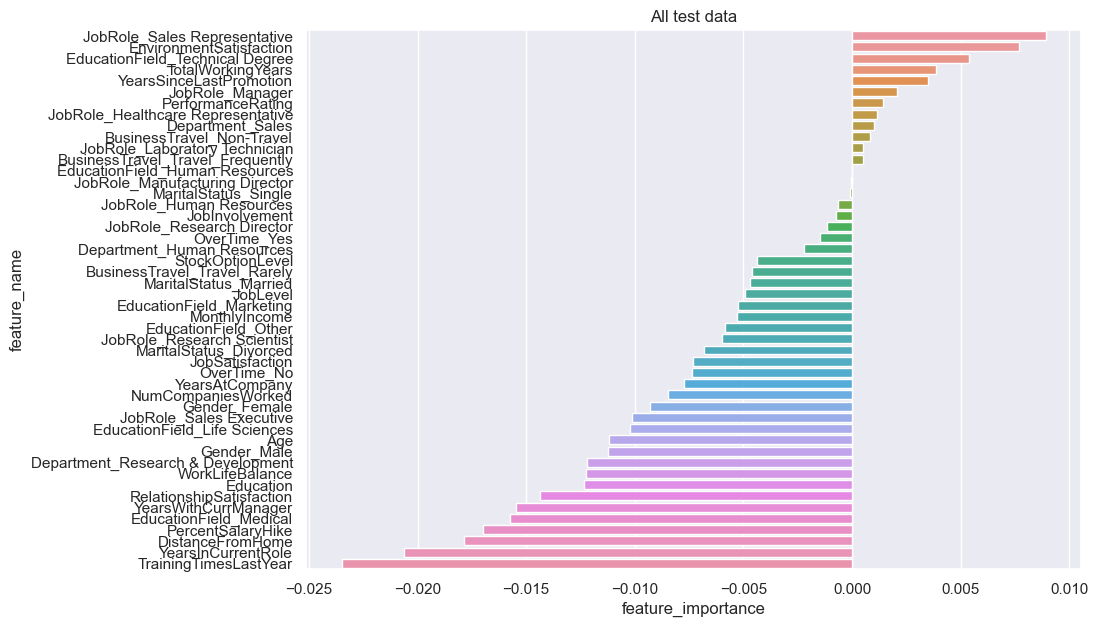

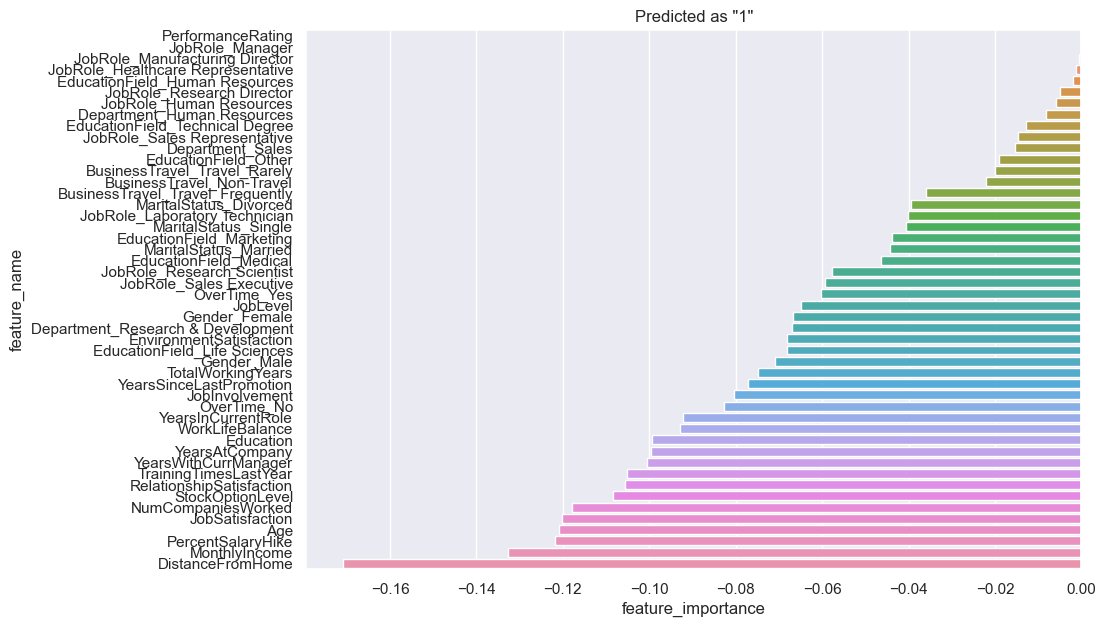

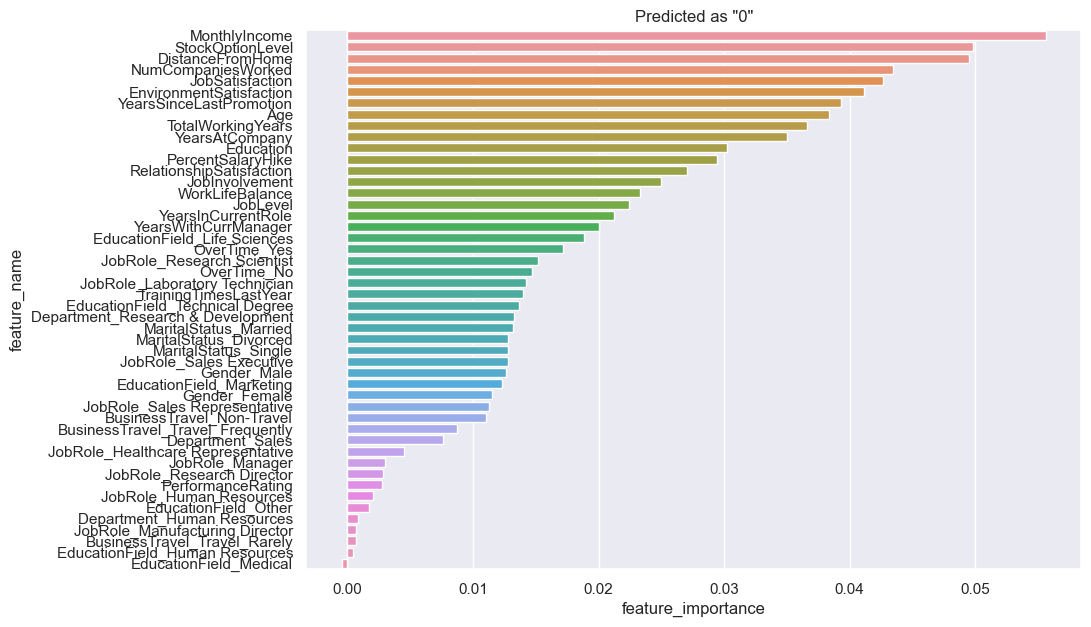

In [148]:
def plot_feature_importances(model, x, y, title):
    result = permutation_importance(
        model, x, y, n_repeats=50, random_state=1, n_jobs=-1
    )
    df = pd.DataFrame(
        {"feature_name": x.columns, "feature_importance": result.importances_mean}
    )
    plt.figure(figsize=(10, 7))
    sns.barplot(
        data=df,
        x="feature_importance",
        y="feature_name",
        order=df.sort_values("feature_importance", ascending=False).feature_name,
    )
    plt.title(title)
    plt.show()


plot_feature_importances(stacking_classifier, X_val, y_val, "All test data")

y_pred = stacking_classifier.predict(X_val)

plot_feature_importances(
    stacking_classifier, X_val[y_pred == 1], y_val[y_pred == 1], 'Predicted as "1"'
)
plot_feature_importances(
    stacking_classifier, X_val[y_pred == 0], y_val[y_pred == 0], 'Predicted as "0"'
)

## Predictions

In [149]:
predictions = stacking_classifier.predict(X_val)

X_val['Attrition'] = predictions.tolist()

In [150]:
X_val

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
687,36,2,4,3,3,1,3,2519,4,21,4,3,0,16,6,3,11,8,3,9,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
289,28,8,2,4,3,1,4,3310,1,21,4,4,0,5,3,3,5,3,0,2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
481,34,1,2,2,2,1,4,3622,1,13,3,4,1,6,3,3,6,5,1,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1096,40,6,2,3,3,4,4,16437,1,21,4,4,0,21,2,3,21,7,7,7,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
178,46,1,2,2,3,3,1,10453,1,25,4,3,3,24,2,3,24,13,15,7,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,42,1,1,2,3,2,3,4907,1,25,4,3,0,20,3,3,20,16,11,6,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
494,34,14,3,3,3,1,3,2579,1,18,3,4,2,8,3,3,8,2,0,6,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
1343,29,7,3,4,3,1,1,2062,3,14,3,2,0,11,2,3,3,2,1,2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
180,31,12,1,3,3,1,4,3929,8,23,4,3,1,7,0,3,4,2,0,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


## Generating fake names

In [157]:
# installing packages that may not already be installed
!pip install mimesis

# loading required libraries
from mimesis import Person
from mimesis.enums import Gender

# setting up parameters pertaining to mimesis
person = Person('en')

# ascertain number of fake names needed
nrows=X_val.shape[1]

# create a column for name 
X_val.insert(0, "Name", "")

for i in X_val.index:
    if X_val.loc[i, 'Gender_Female']==1:
        last=person.last_name(gender=Gender.FEMALE)
        first=person.first_name(gender=Gender.FEMALE)
    else:
        last=person.last_name(gender=Gender.MALE)
        first=person.first_name(gender=Gender.MALE)
        
    X_val.loc[i, 'Name'] = last + ", " + first
    #print(i)
#person.last_name()+", "+person.first_name()

In [158]:
X_val

,Name,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
687,"Noel, Jamie",36,2,4,3,3,1,3,2519,4,21,4,3,0,16,6,3,11,8,3,9,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
289,"Knight, Joslyn",28,8,2,4,3,1,4,3310,1,21,4,4,0,5,3,3,5,3,0,2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
481,"Fleming, Darnell",34,1,2,2,2,1,4,3622,1,13,3,4,1,6,3,3,6,5,1,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1096,"Bradshaw, Evan",40,6,2,3,3,4,4,16437,1,21,4,4,0,21,2,3,21,7,7,7,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
178,"Schwartz, Siu",46,1,2,2,3,3,1,10453,1,25,4,3,3,24,2,3,24,13,15,7,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,"Cole, Lucio",42,1,1,2,3,2,3,4907,1,25,4,3,0,20,3,3,20,16,11,6,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
494,"Yang, Obdulia",34,14,3,3,3,1,3,2579,1,18,3,4,2,8,3,3,8,2,0,6,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
1343,"Villarreal, Bryant",29,7,3,4,3,1,1,2062,3,14,3,2,0,11,2,3,3,2,1,2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
180,"Keith, Hildred",31,12,1,3,3,1,4,3929,8,23,4,3,1,7,0,3,4,2,0,2,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


## Exporting to a csv file

In [161]:
X_val.to_csv('out.csv')

In [160]:
X_val.head()

,Name,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
687,"Noel, Jamie",36,2,4,3,3,1,3,2519,4,21,4,3,0,16,6,3,11,8,3,9,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
289,"Knight, Joslyn",28,8,2,4,3,1,4,3310,1,21,4,4,0,5,3,3,5,3,0,2,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
481,"Fleming, Darnell",34,1,2,2,2,1,4,3622,1,13,3,4,1,6,3,3,6,5,1,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1096,"Bradshaw, Evan",40,6,2,3,3,4,4,16437,1,21,4,4,0,21,2,3,21,7,7,7,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
178,"Schwartz, Siu",46,1,2,2,3,3,1,10453,1,25,4,3,3,24,2,3,24,13,15,7,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
